<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import math

In [ ]:
shuff = ['1', '2', '3', '4', '5', '6']
temps = ['50.0', '50_b', '50_c']
c = 66

In [ ]:
path = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/results_trj.lammpstrj'
path = f'/content/drive/MyDrive/CHUNK_66_132/{e}/results_trj.lammpstrj'
path = f'/content/drive/MyDrive/A_132/{e}/results_trj.lammpstrj'

1
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


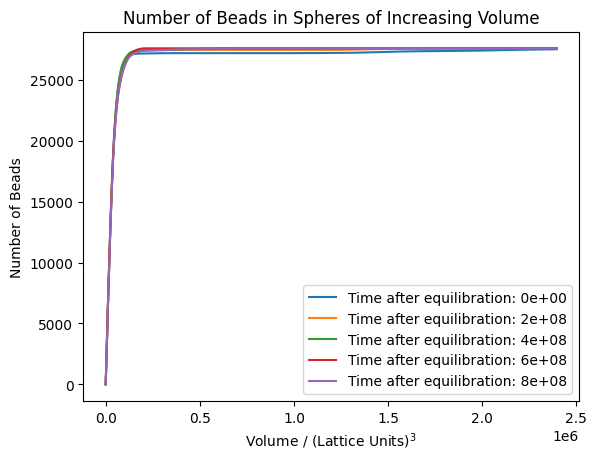

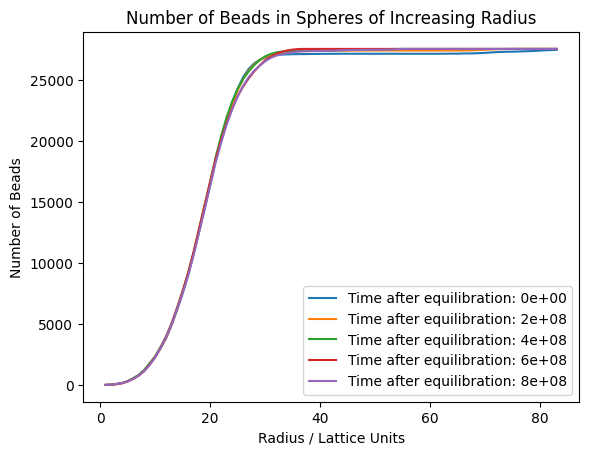

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


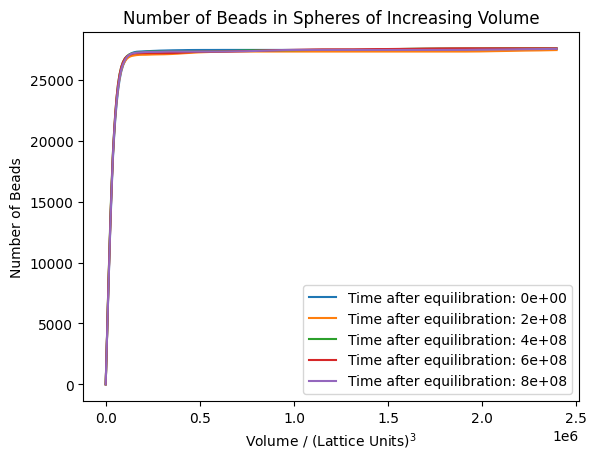

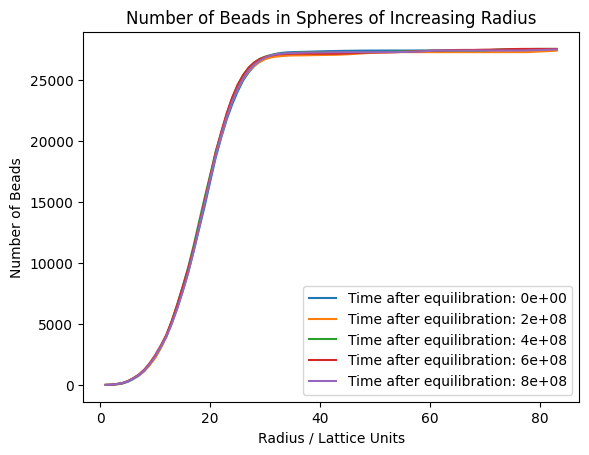

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


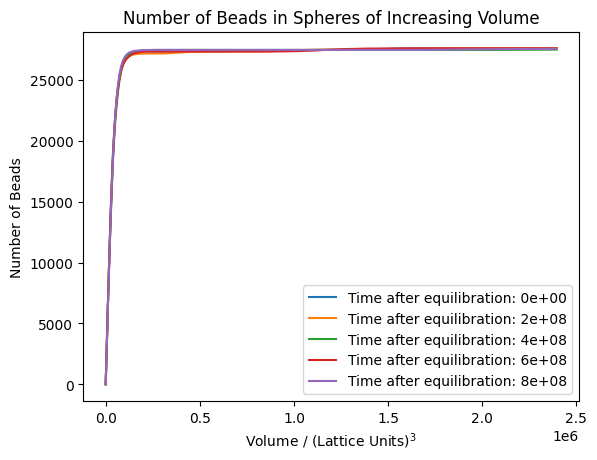

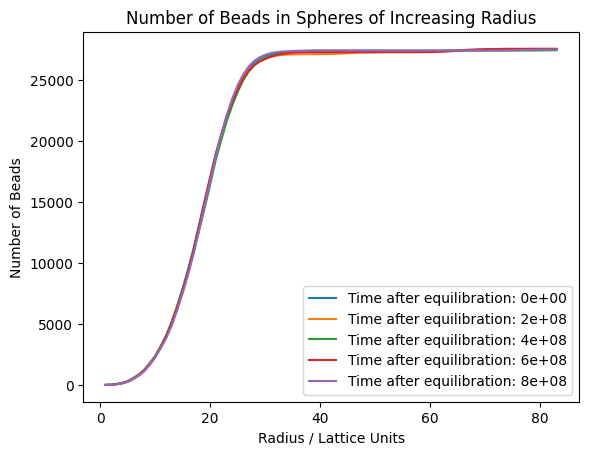

2
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


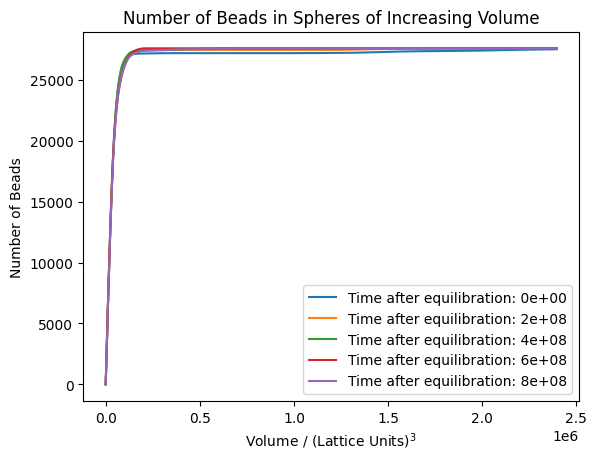

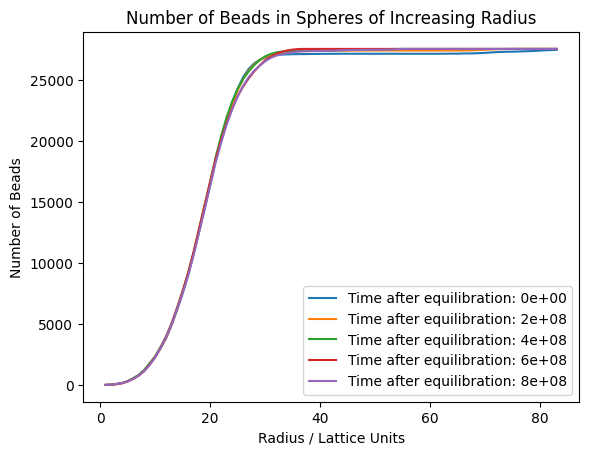

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


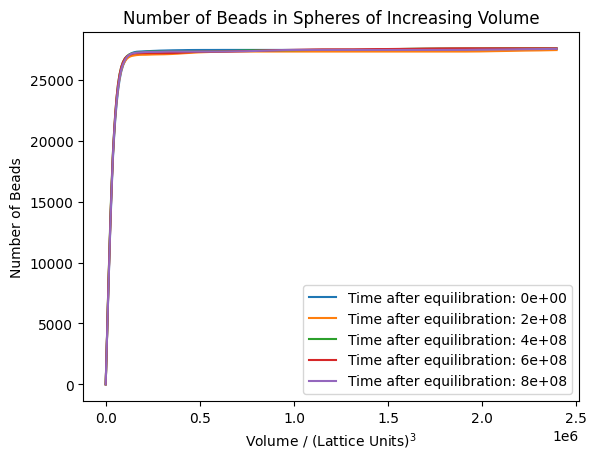

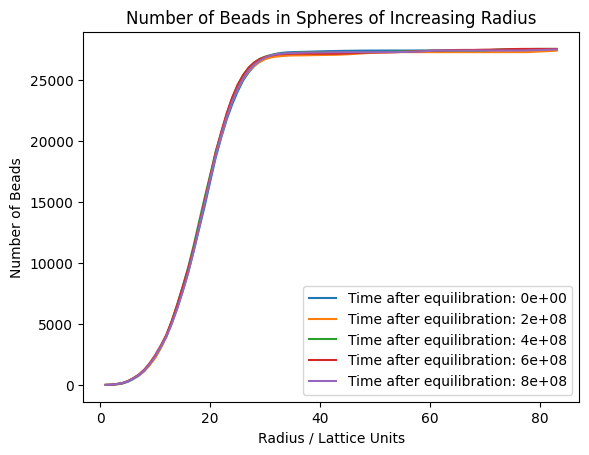

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


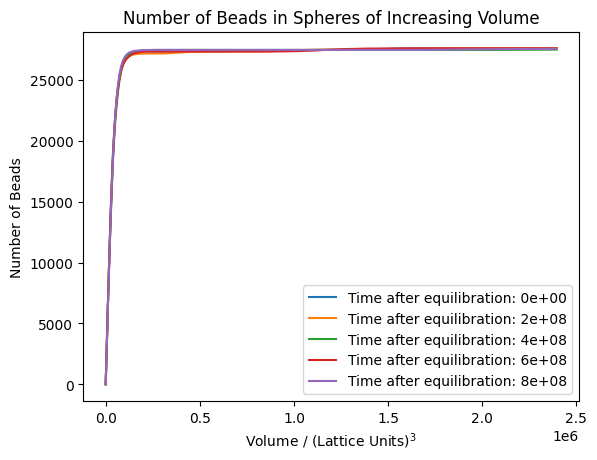

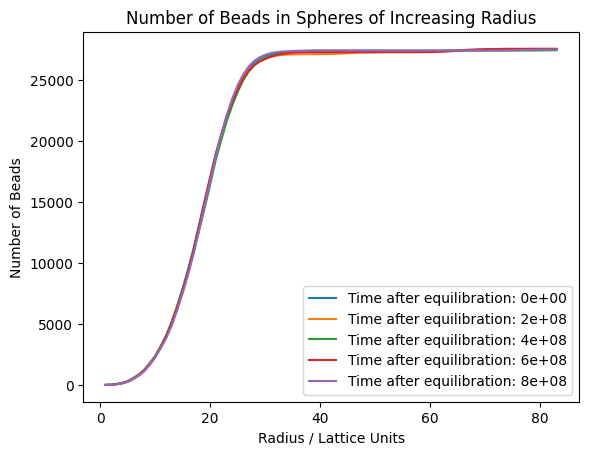

3
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


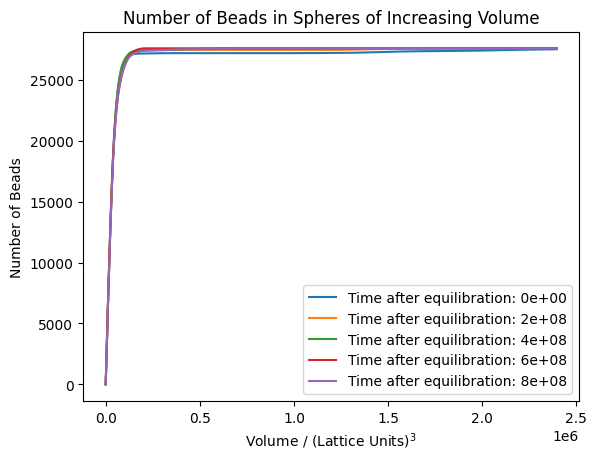

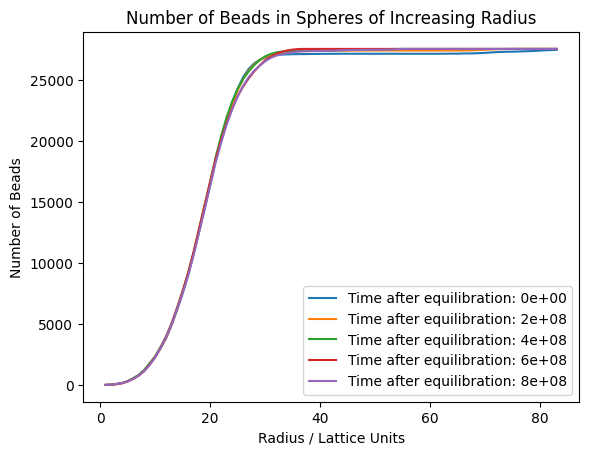

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


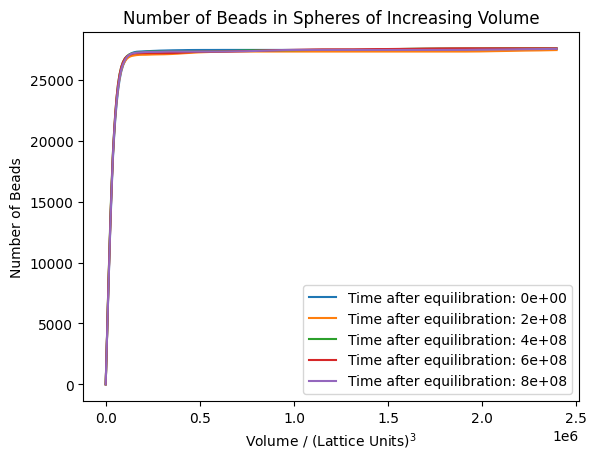

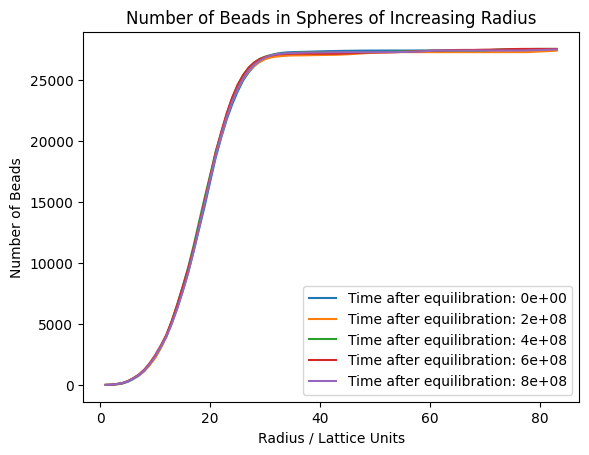

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


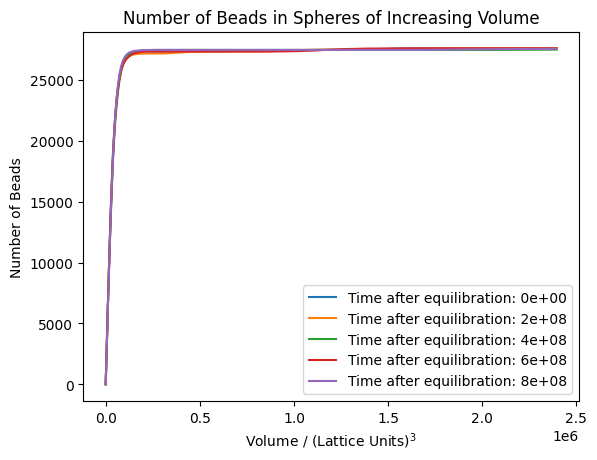

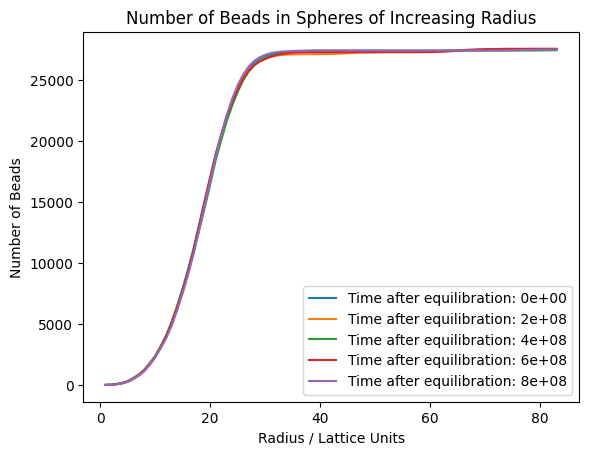

4
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


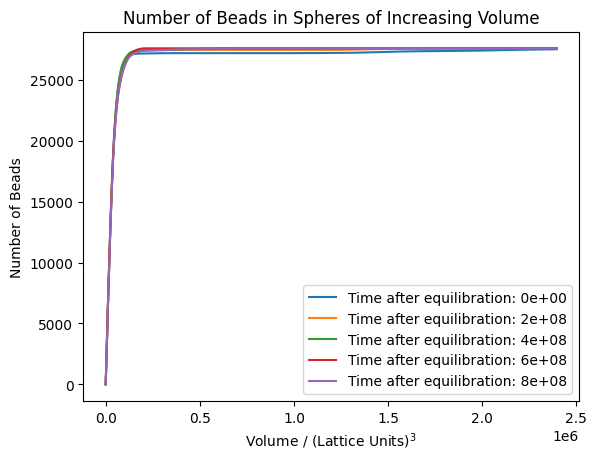

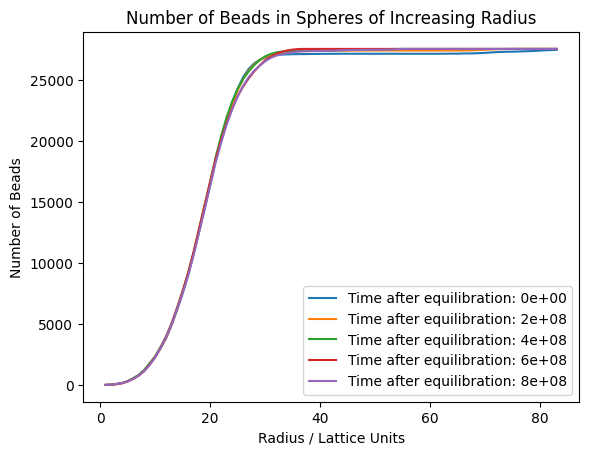

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


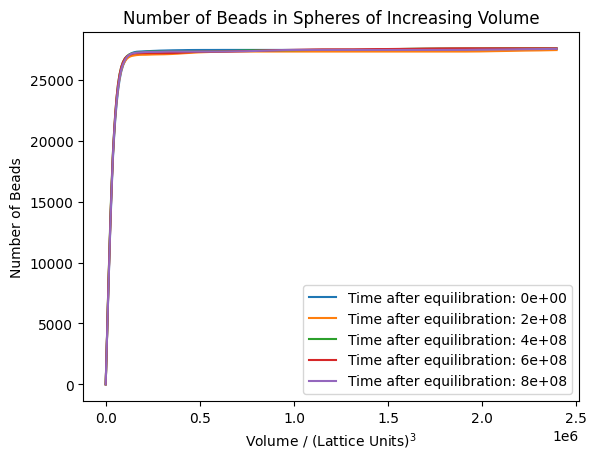

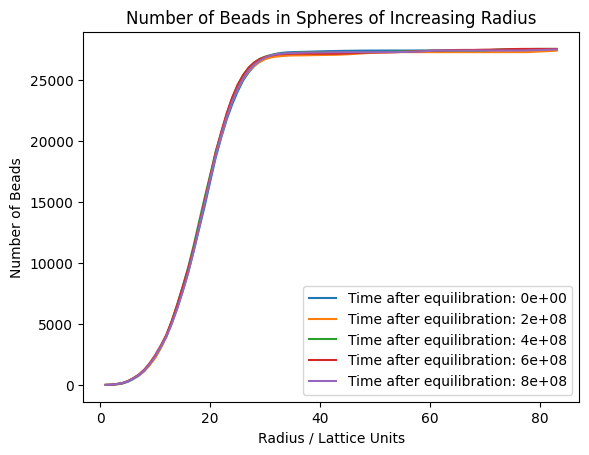

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


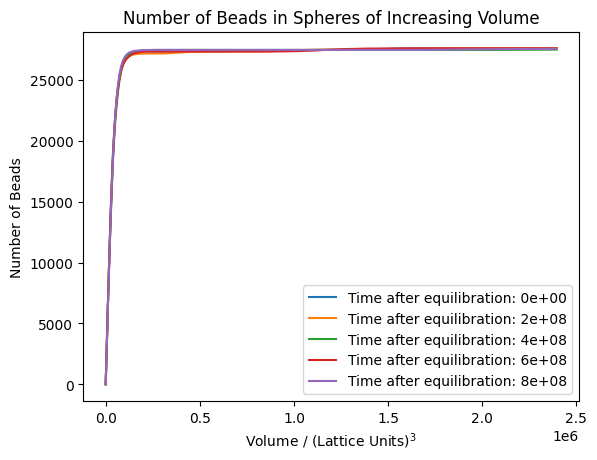

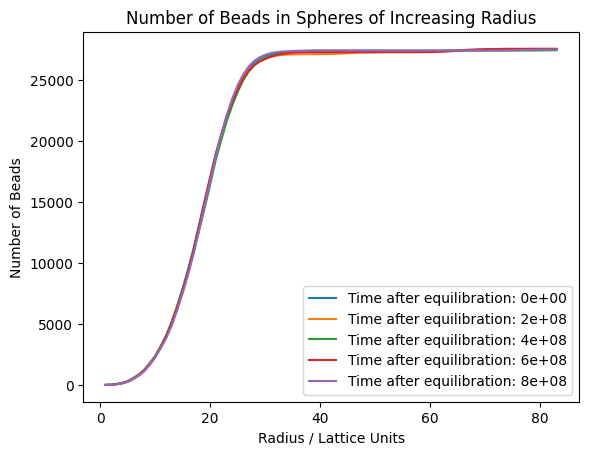

5
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


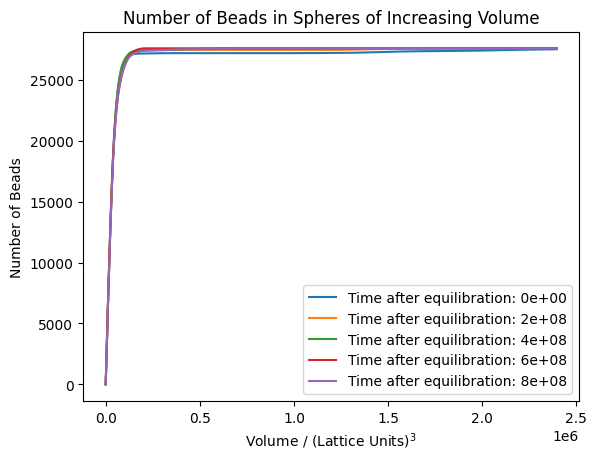

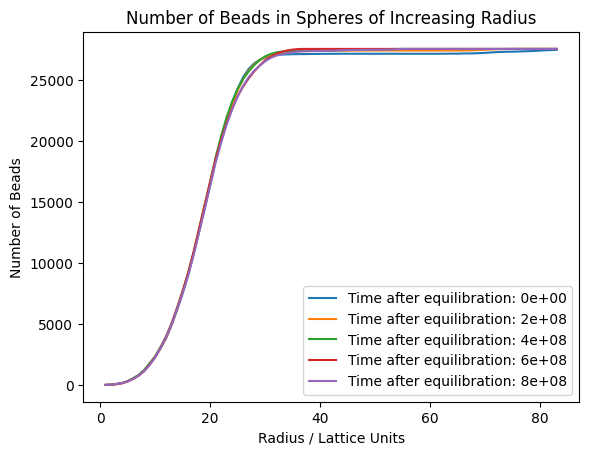

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


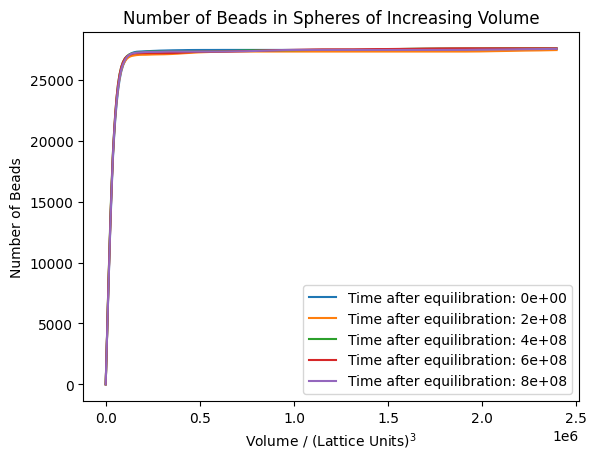

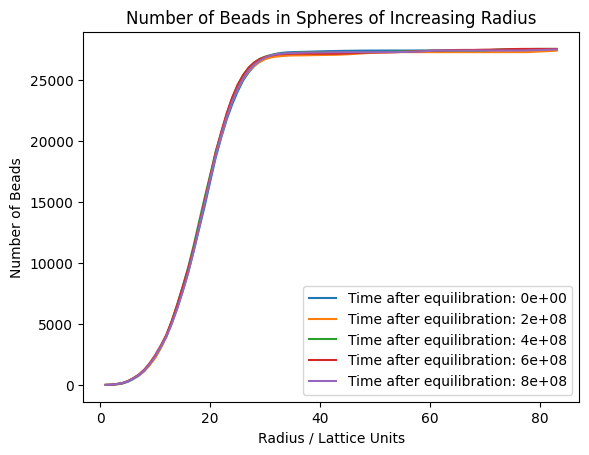

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


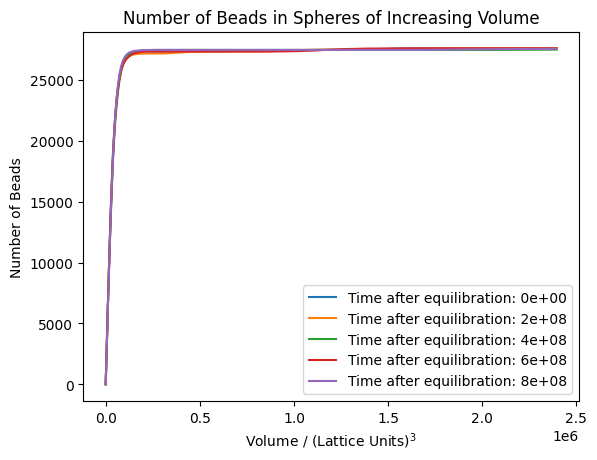

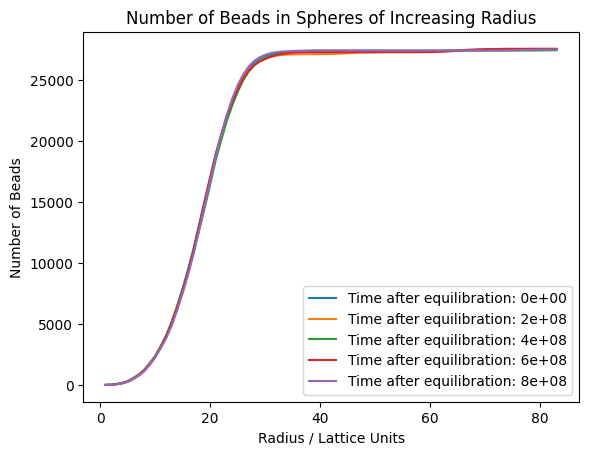

6
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


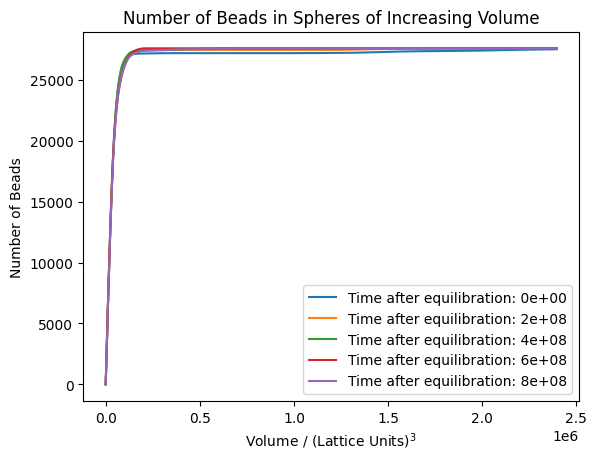

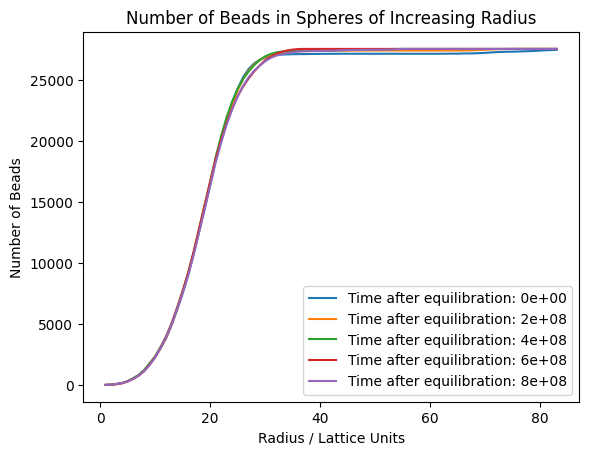

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


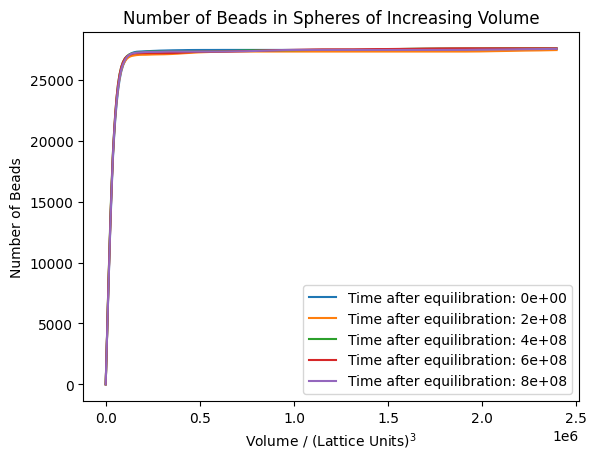

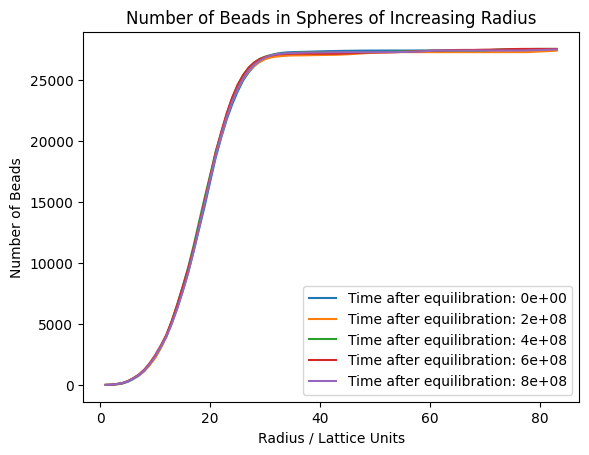

[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
2202000000
2402000000
2602000000
2802000000


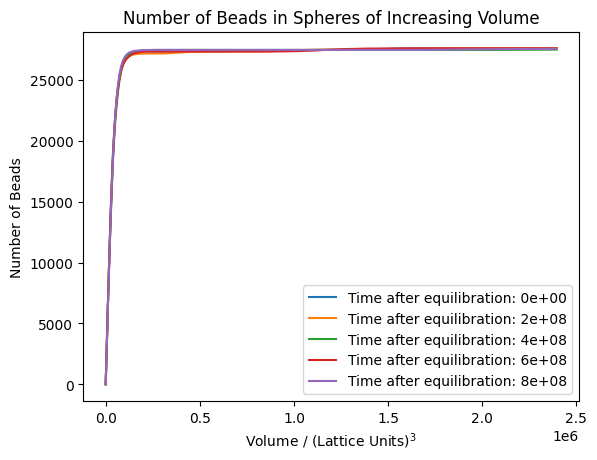

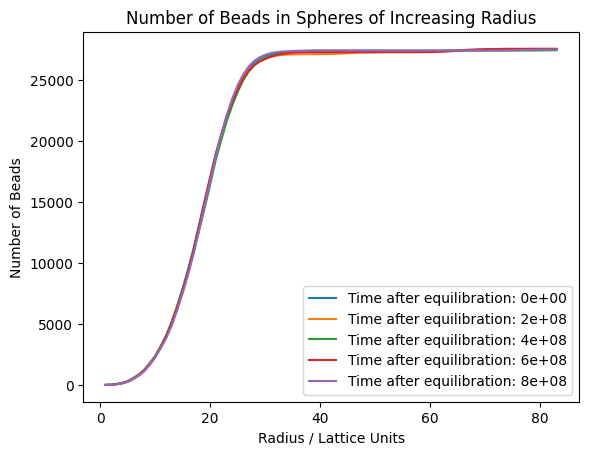

In [ ]:
particle_counts_dict = {}
for d in shuff:
  print(d)
  particle_counts_dict[d] = {}
  for e in temps:
    path = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/results_trj.lammpstrj'
    particle_counts_dict[d][e] = {}
    times = []
    for i in range(5):
        time = 2000000000 + i * 200000000 + 2000000
        #time = 1200000000 + i * 200000000 + 2000000
        times.append(time)
    print(times)

    for i, t in enumerate(times):
      print(t)
      x_coords, y_coords, z_coords = [], [], []
      start_processing = False
      with open(path, 'r') as file:
        for line in file:
            if line.startswith('ITEM: TIMESTEP'):
              timestep_value = next(file).strip()

              if timestep_value == str(t):
                start_processing = True
              else:
                start_processing = False
                continue

            if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
              continue

            if start_processing:
              items = line.split()
              if len(items) >= 7:
                x_coords.append(float(items[3]))
                y_coords.append(float(items[4]))
                z_coords.append(float(items[5]))

      x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
      coordinates = np.column_stack((x_coords, y_coords, z_coords))
      center = np.array([60, 60, 60])
      # Calculate distances for the current run
      distances = np.linalg.norm(coordinates - center, axis=1)
      distances = np.abs(distances)
      distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)

      max_radius = 0.5*np.sqrt((120**2+120**2))
      max_radius = int(max_radius)
      #adjust = 1/np.sqrt(3)
      adjust = 1
      radii = list(np.arange(adjust, max_radius, adjust))
      volumes = list((4/3) * np.pi * radius**3 for radius in radii)
      radii = list(np.arange(adjust, max_radius, adjust))
                # Count the number of particles within each sphere of increasing radius
      particle_counts_dict[d][e][t] = [np.sum(distances <= radius) for radius in radii]

    particle_counts_dict_inner = particle_counts_dict[d][e]
    label_1 = f'$^3$'
    for label, counts in particle_counts_dict_inner.items():
        time_eq = label - 2002000000
        formatted_time_eq = "{:.0e}".format(time_eq)
        label_new = f'Time after equilibration: {formatted_time_eq}'
        plt.plot(volumes, counts, label=label_new)

    plt.xlabel(f'Volume / (Lattice Units){label_1}')
    plt.ylabel('Number of Beads')
    plt.title('Number of Beads in Spheres of Increasing Volume')
    plt.legend()
    save_path_2 = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/beads_in_volumes_eqtime.png'
    plt.savefig(save_path_2)
    plt.show()

    # Assuming particle_counts_dict is a dictionary with keys as labels and values as lists of particle counts
    for label, counts in particle_counts_dict_inner.items():
        time_eq = label - 2002000000
        formatted_time_eq = "{:.0e}".format(time_eq)
        label_new = f'Time after equilibration: {formatted_time_eq}'
        plt.plot(radii, counts, label=label_new)

    plt.xlabel('Radius / Lattice Units')
    plt.ylabel('Number of Beads')
    plt.title('Number of Beads in Spheres of Increasing Radius')
    plt.legend()
    save_path_2 = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/beads_in_radius_eqtime.png'
    plt.savefig(save_path_2)
    plt.show()



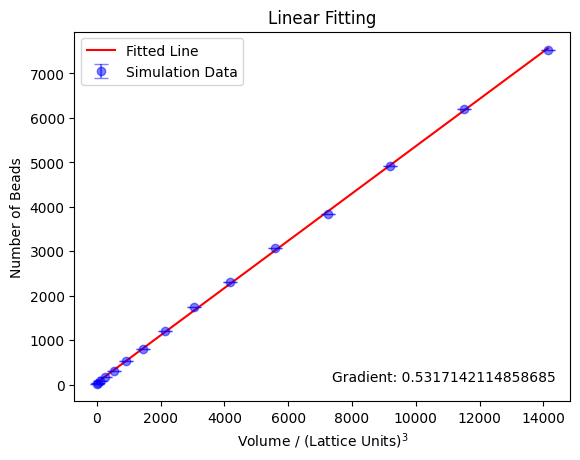

0.5317142114858685


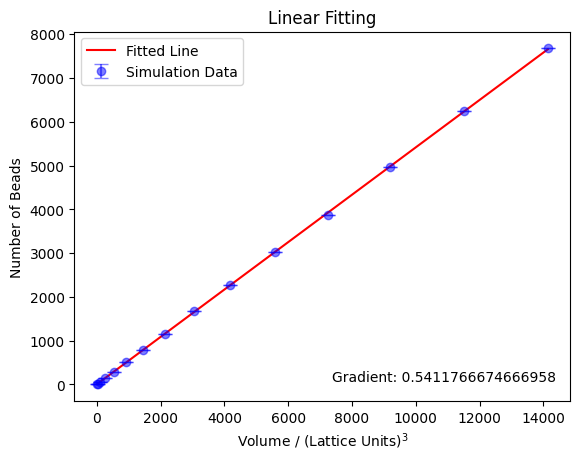

0.5411766674666958


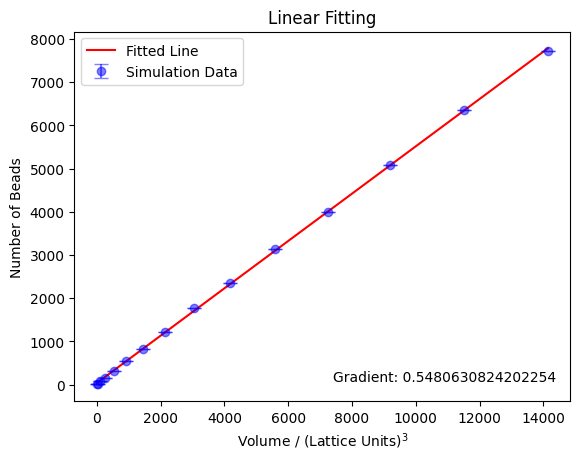

0.5480630824202254


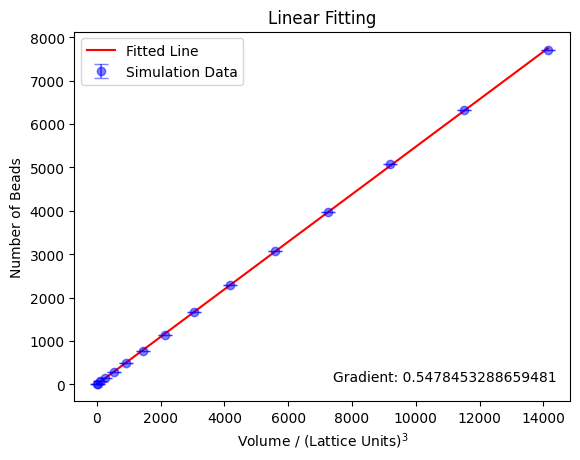

0.5478453288659481


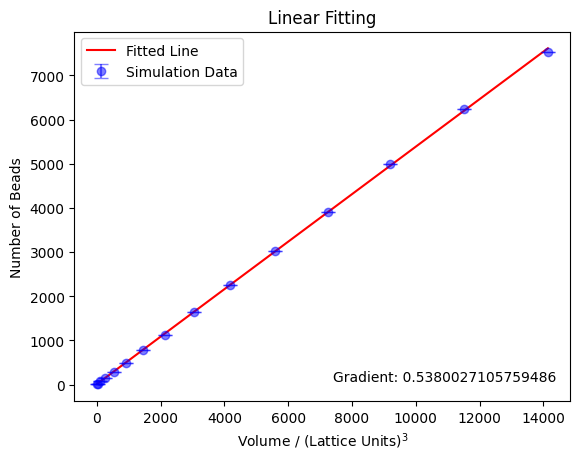

0.5380027105759486


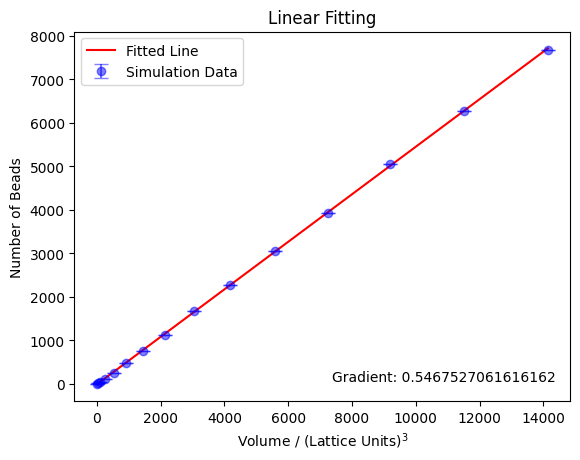

0.5467527061616162


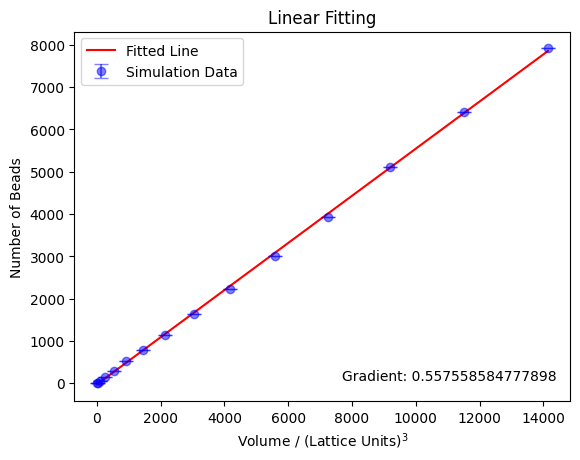

0.557558584777898


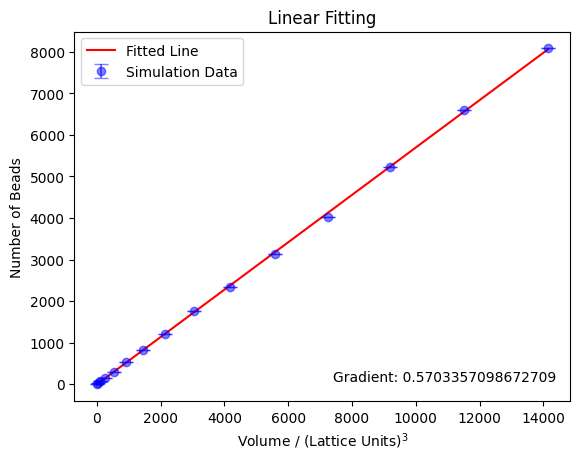

0.5703357098672709


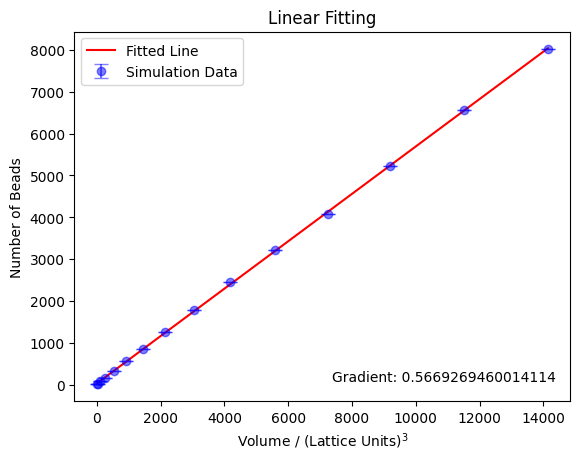

0.5669269460014114


0.5433946726400899


0.5581380858129666


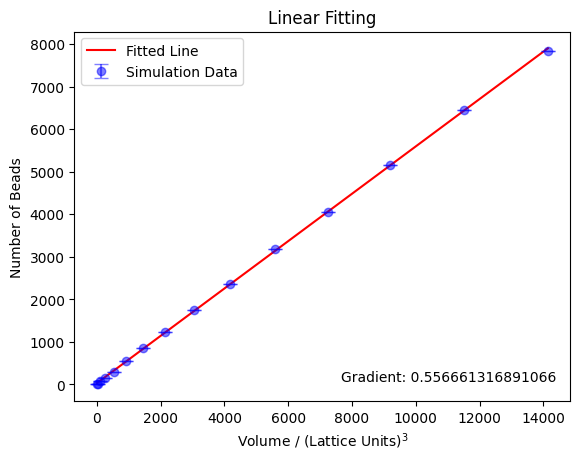

0.556661316891066


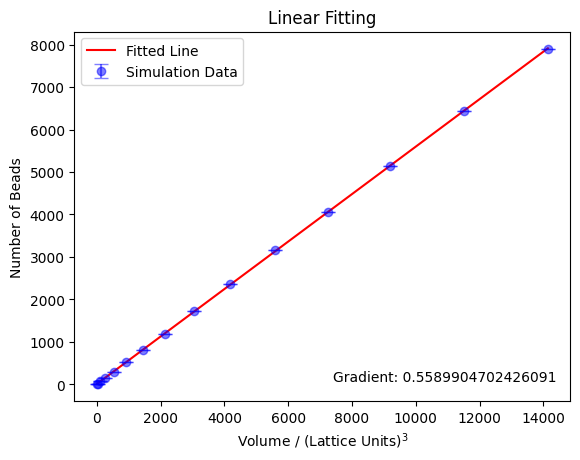

0.5589904702426091


0.5520725996094716


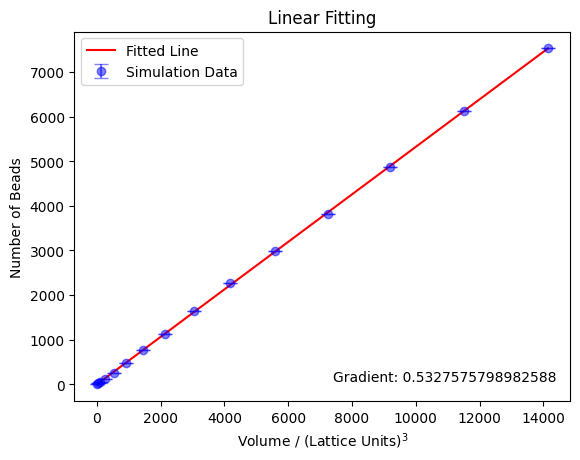

0.5327575798982588


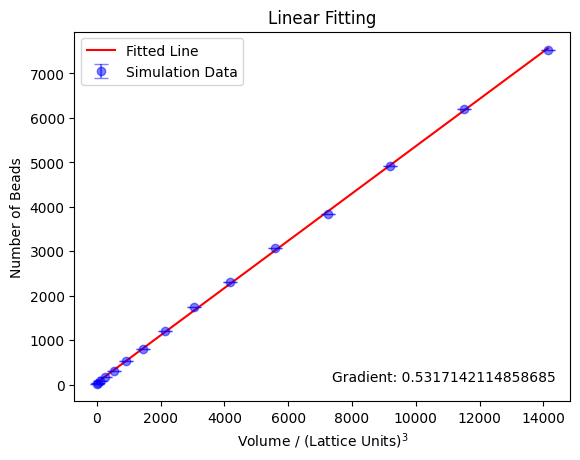

0.5317142114858685


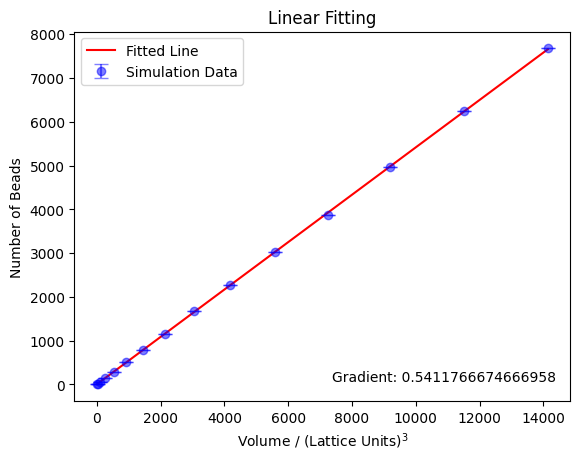

0.5411766674666958


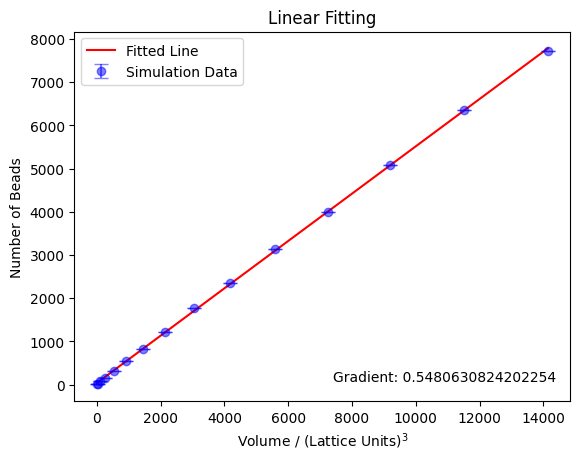

0.5480630824202254


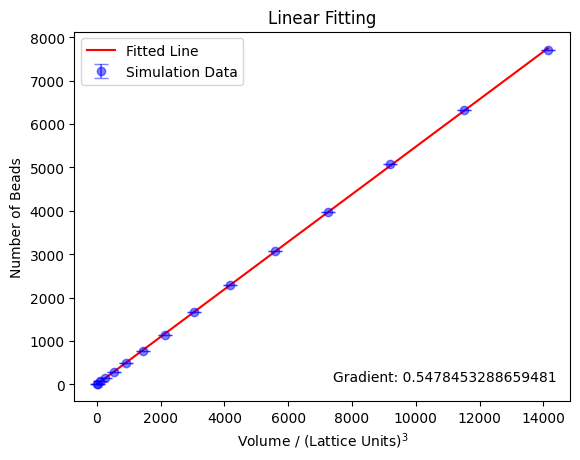

0.5478453288659481


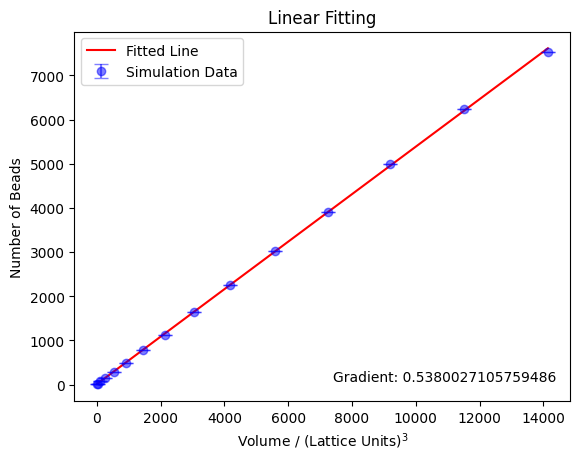

0.5380027105759486


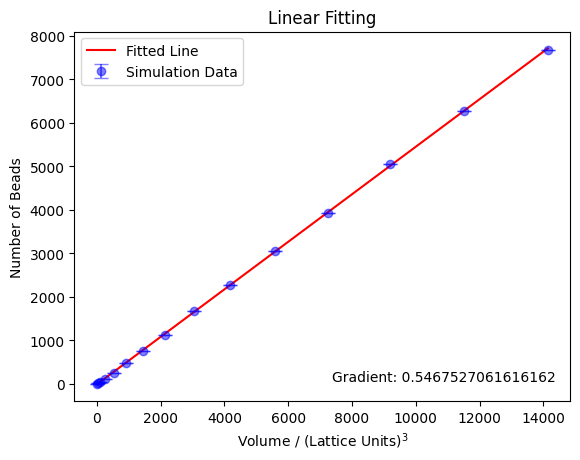

0.5467527061616162


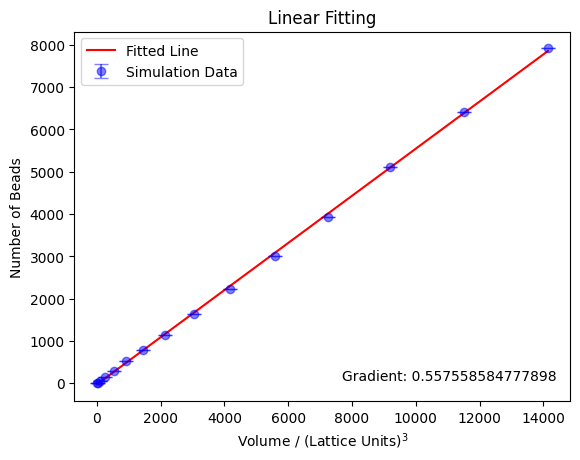

0.557558584777898


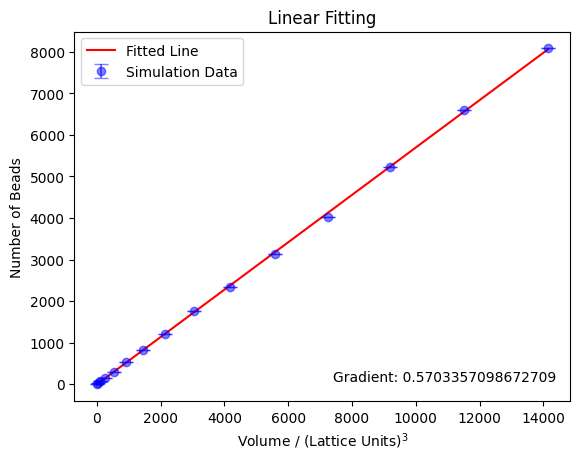

0.5703357098672709


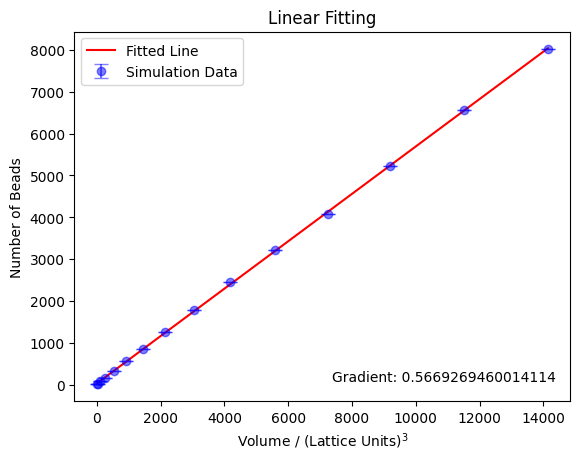

0.5669269460014114


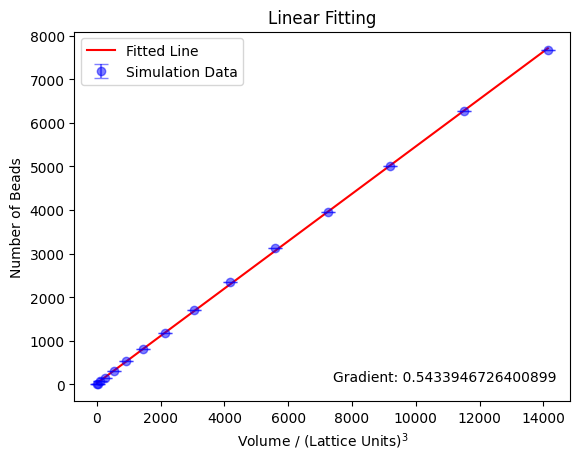

0.5433946726400899


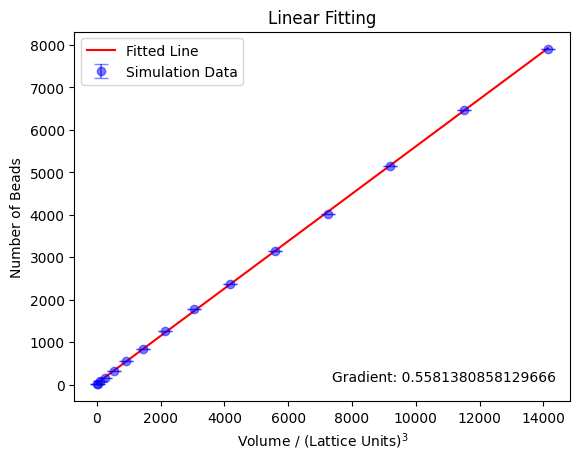

0.5581380858129666


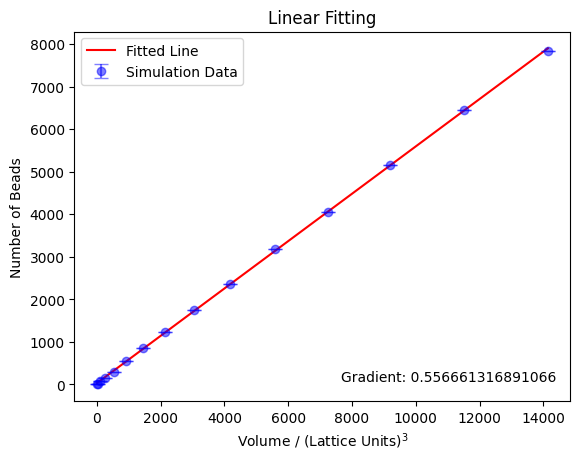

0.556661316891066


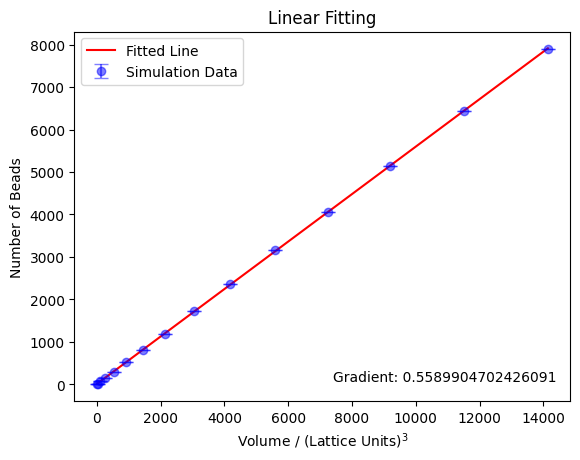

0.5589904702426091


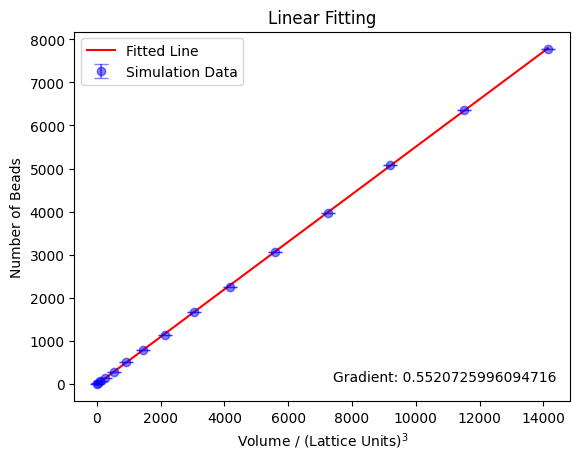

0.5520725996094716


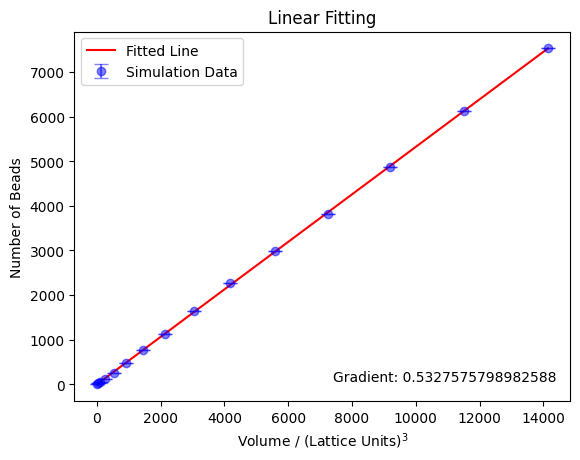

0.5327575798982588


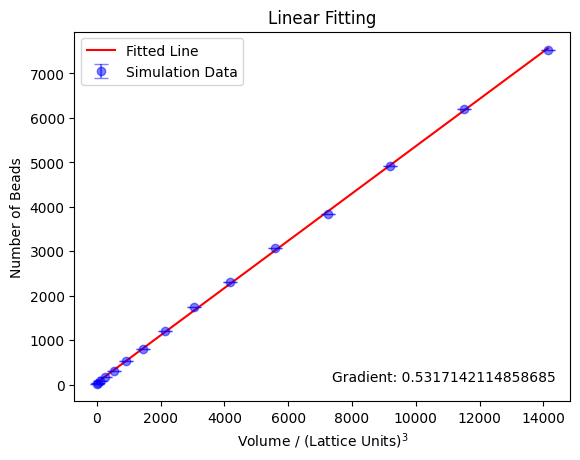

0.5317142114858685


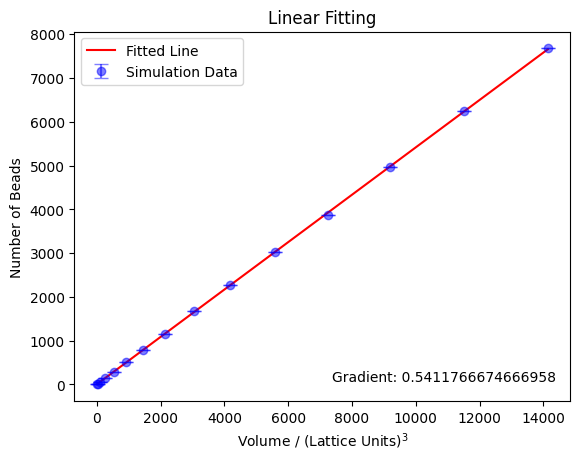

0.5411766674666958


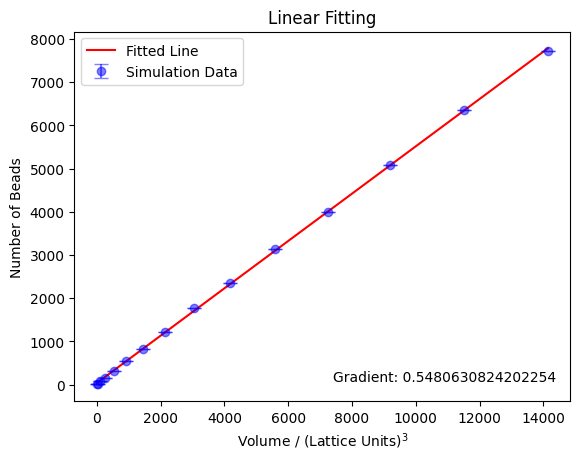

0.5480630824202254


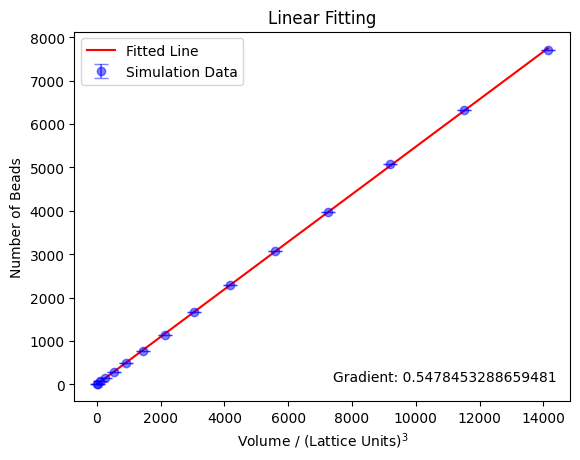

0.5478453288659481


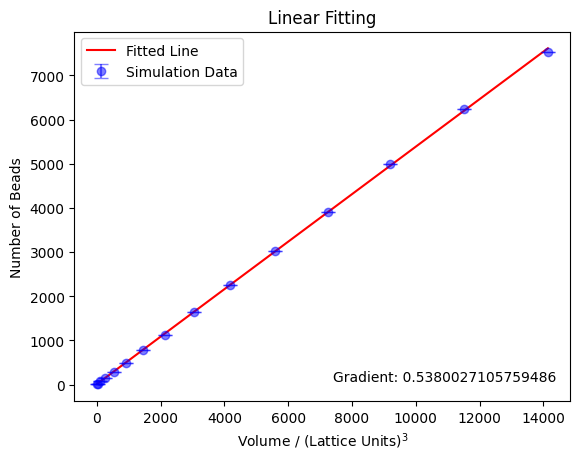

0.5380027105759486


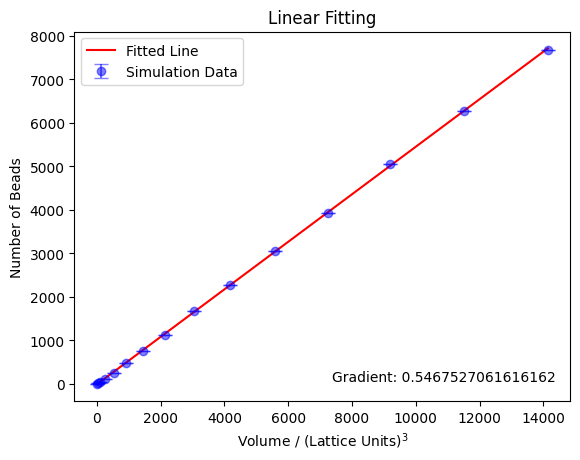

0.5467527061616162


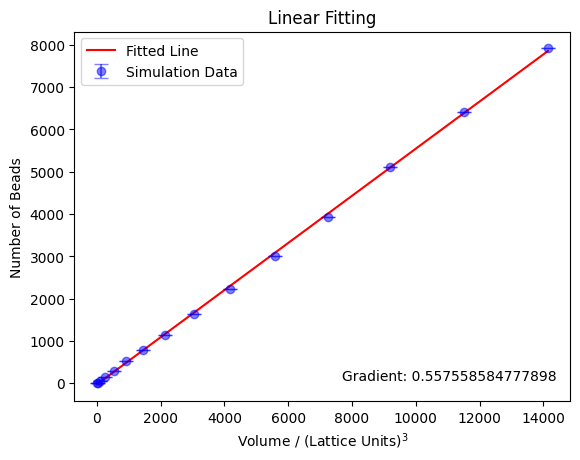

0.557558584777898


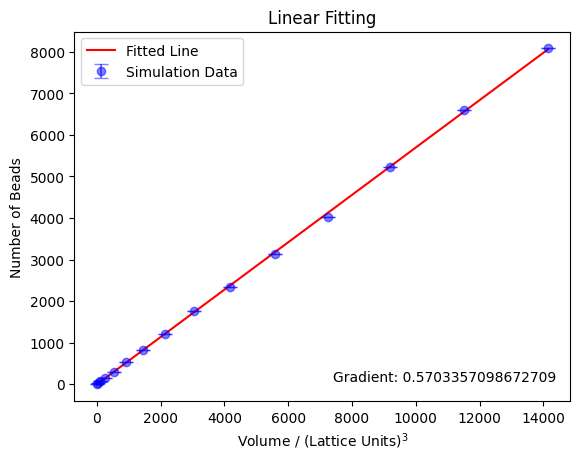

0.5703357098672709


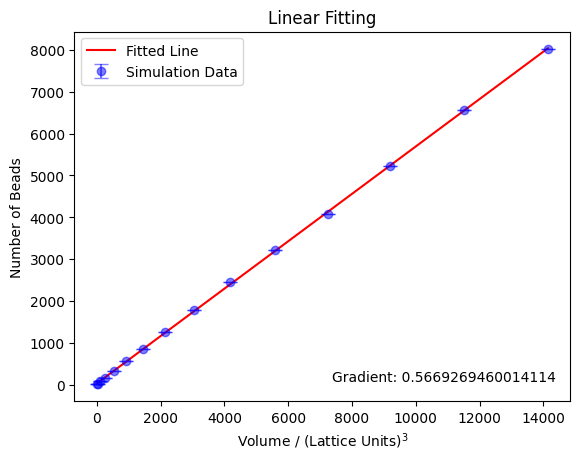

0.5669269460014114


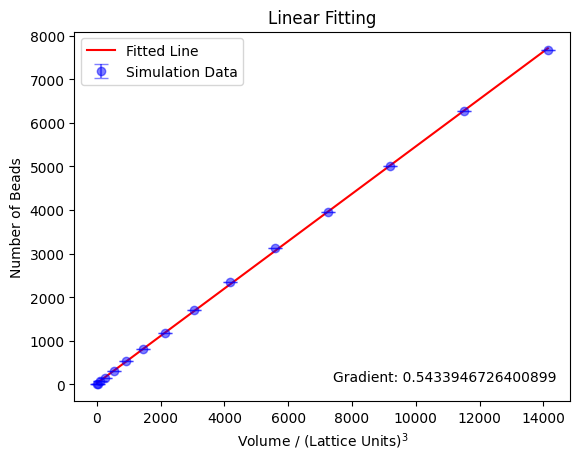

0.5433946726400899


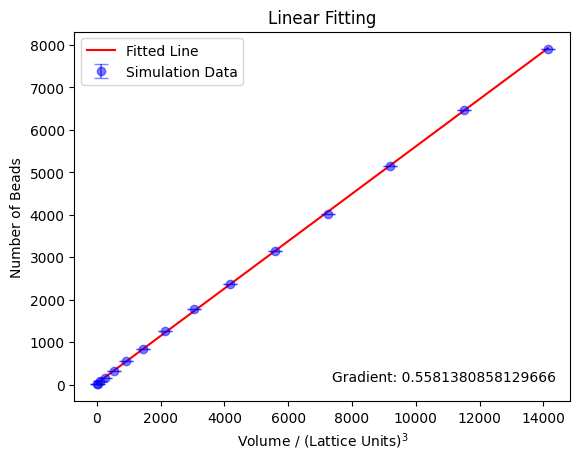

0.5581380858129666


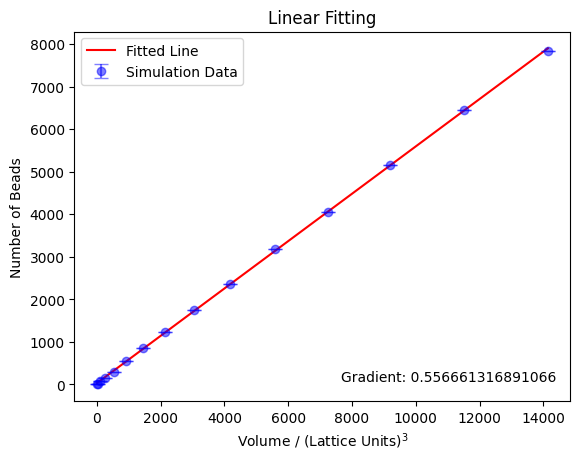

0.556661316891066


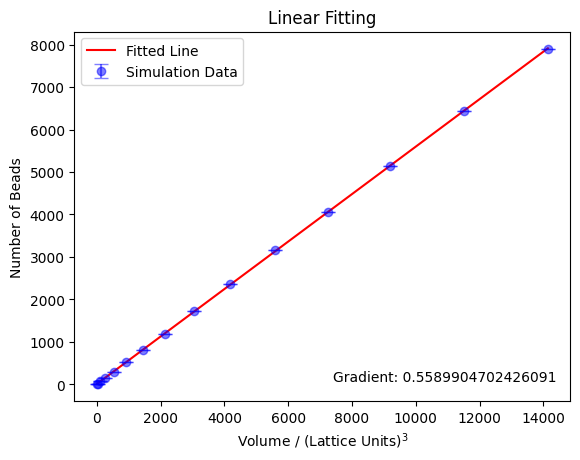

0.5589904702426091


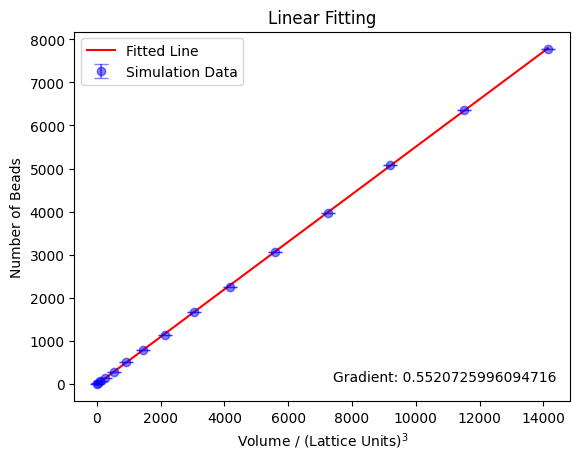

0.5520725996094716


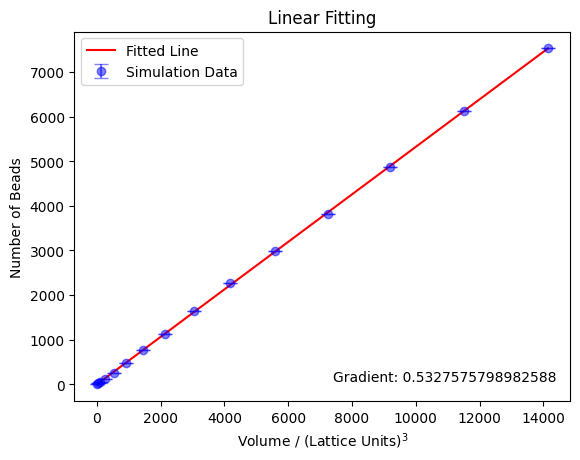

0.5327575798982588


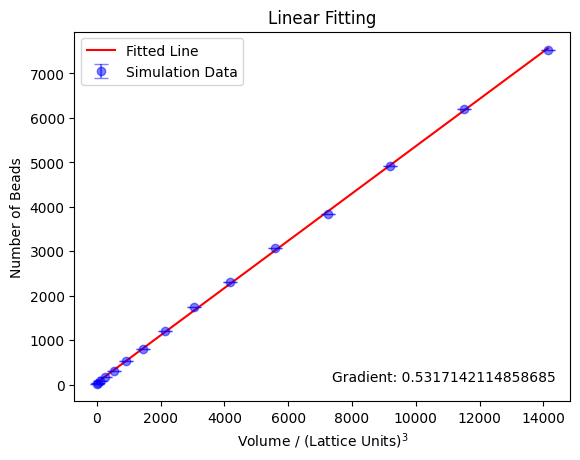

0.5317142114858685


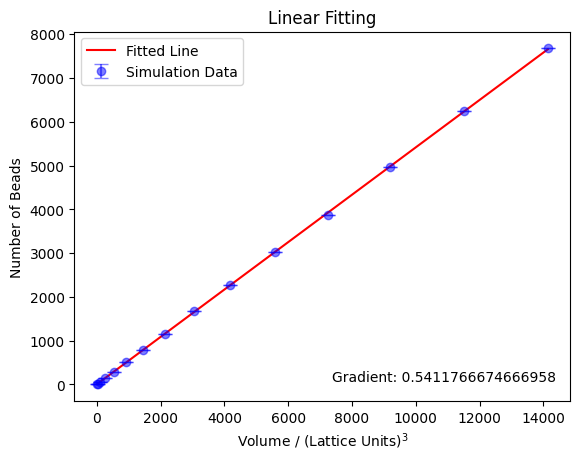

0.5411766674666958


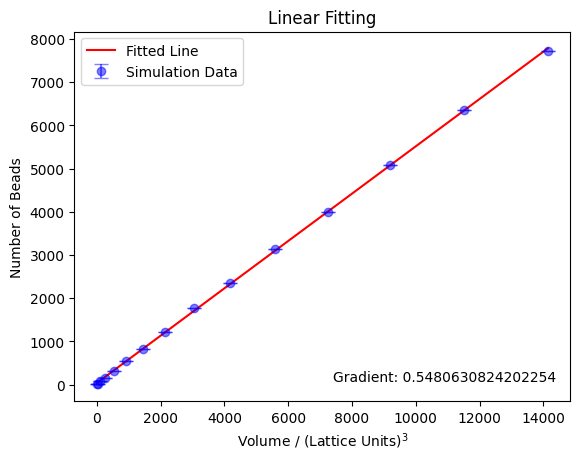

0.5480630824202254


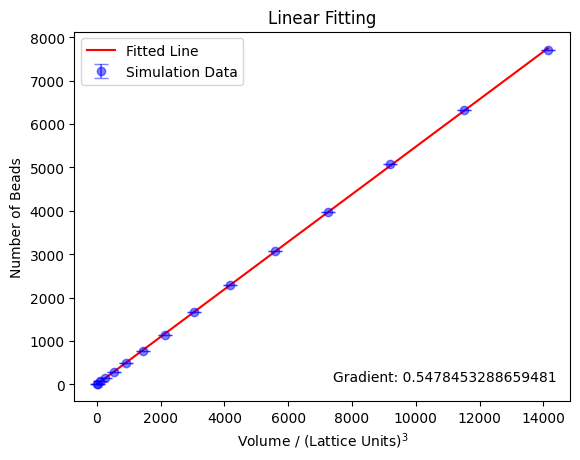

0.5478453288659481


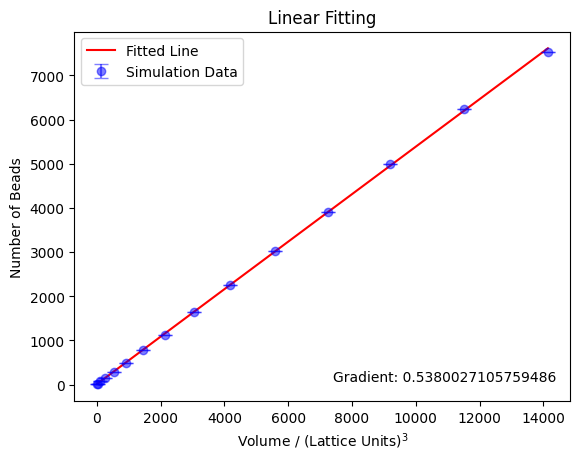

0.5380027105759486


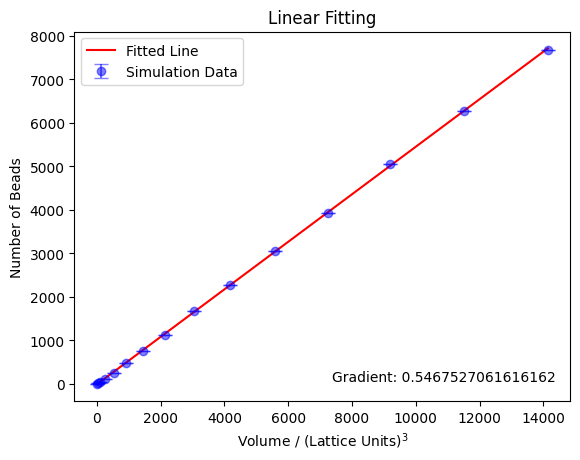

0.5467527061616162


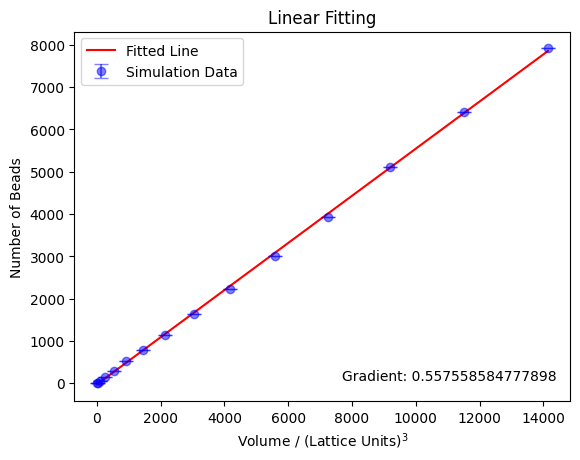

0.557558584777898


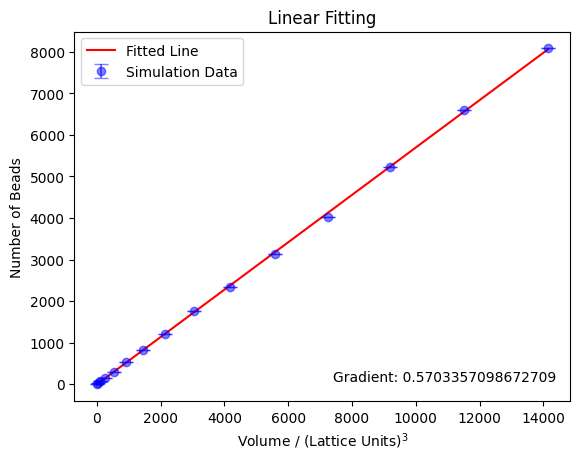

0.5703357098672709


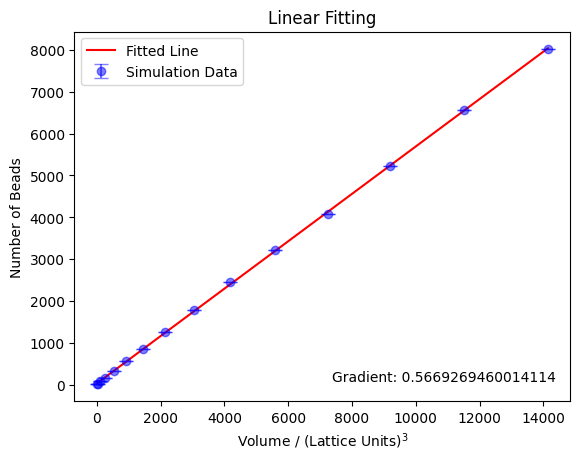

0.5669269460014114


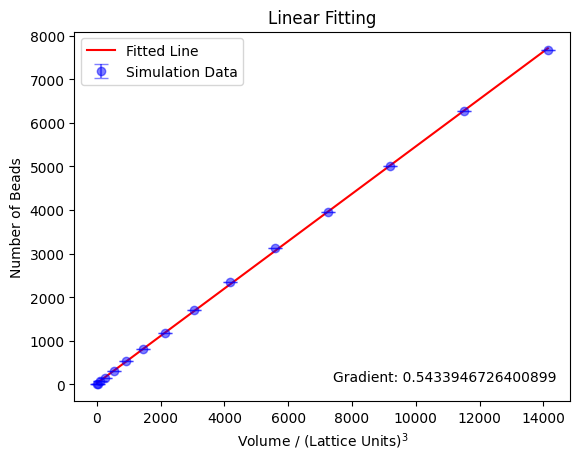

0.5433946726400899


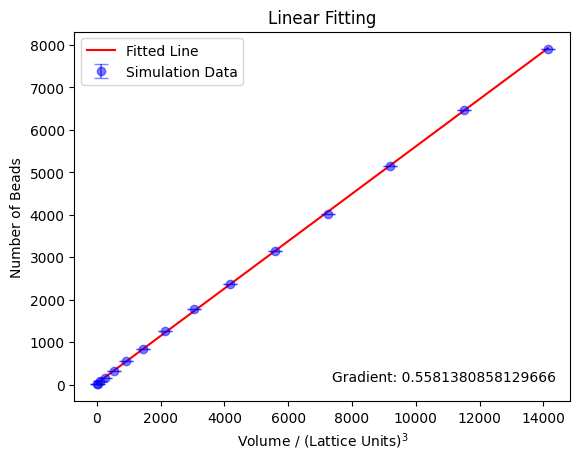

0.5581380858129666


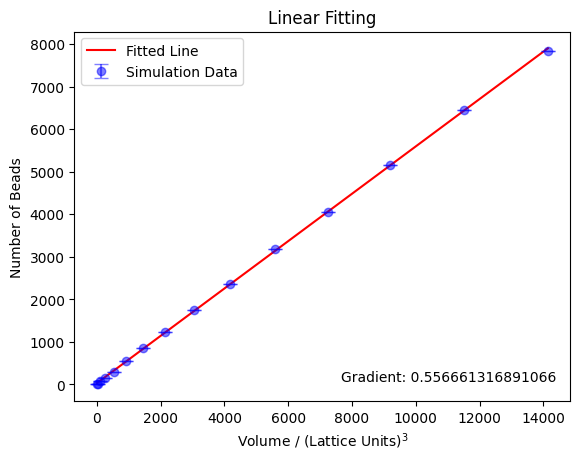

0.556661316891066


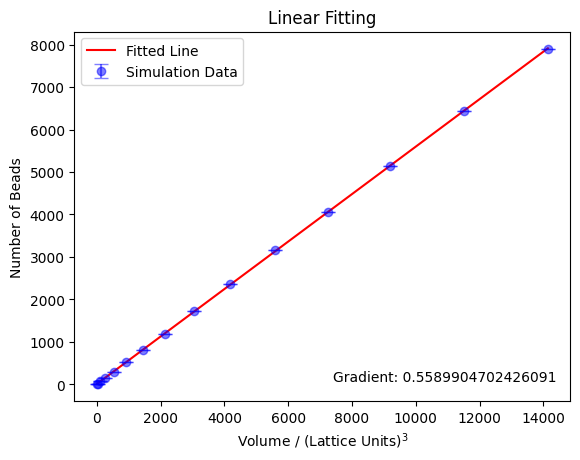

0.5589904702426091


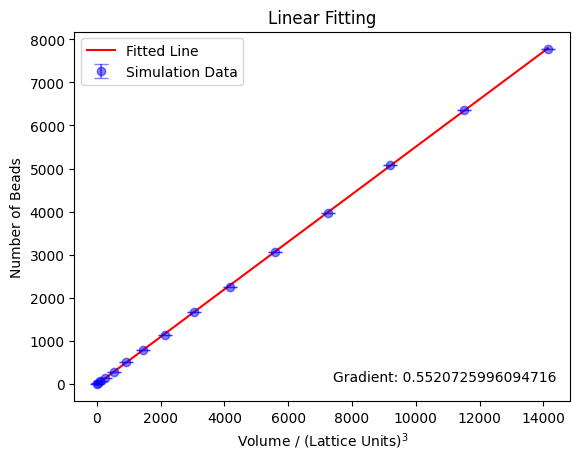

0.5520725996094716


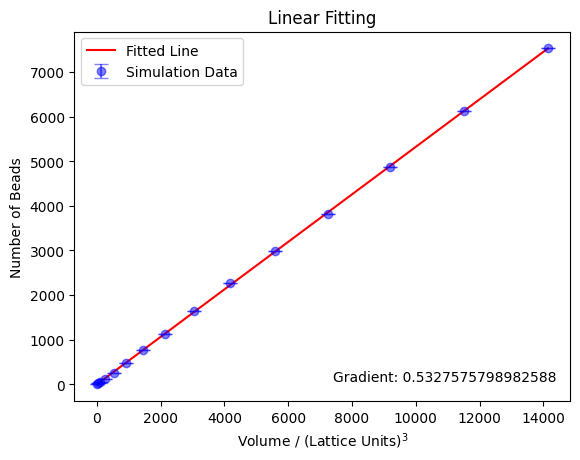

0.5327575798982588


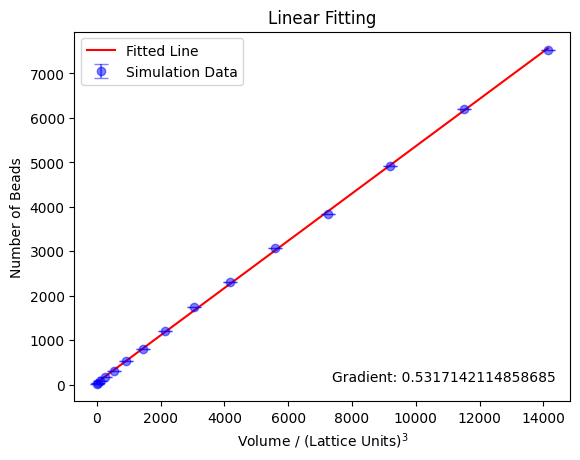

0.5317142114858685


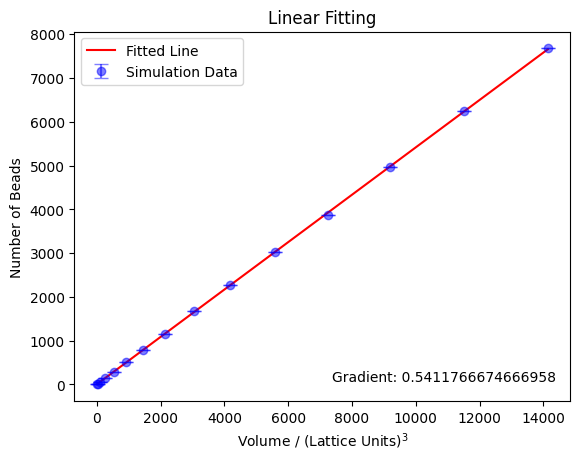

0.5411766674666958


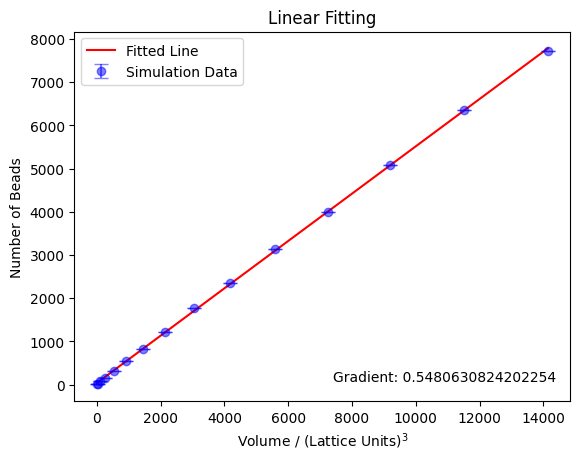

0.5480630824202254


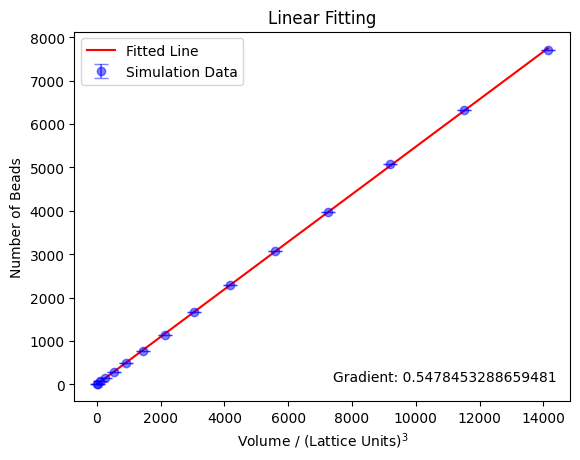

0.5478453288659481


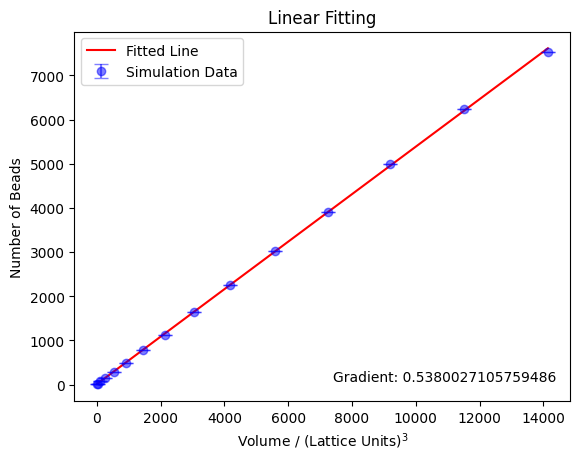

0.5380027105759486


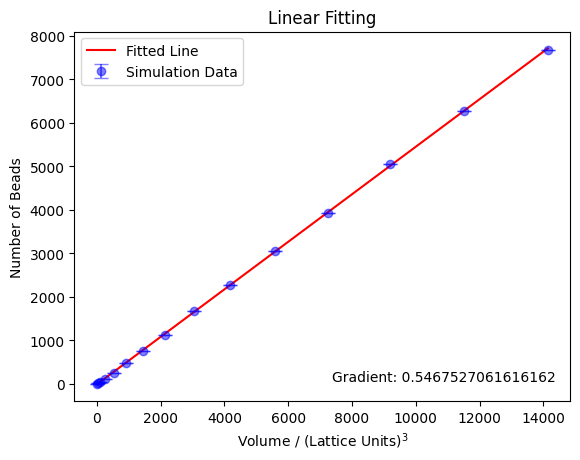

0.5467527061616162


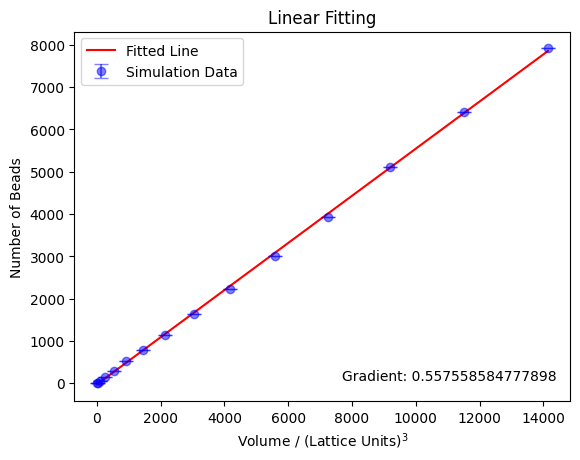

0.557558584777898


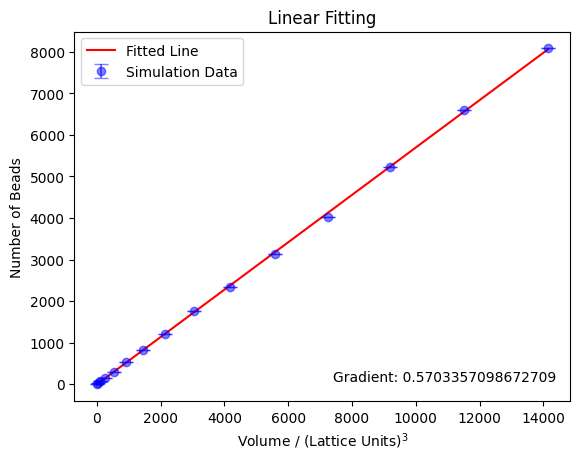

0.5703357098672709


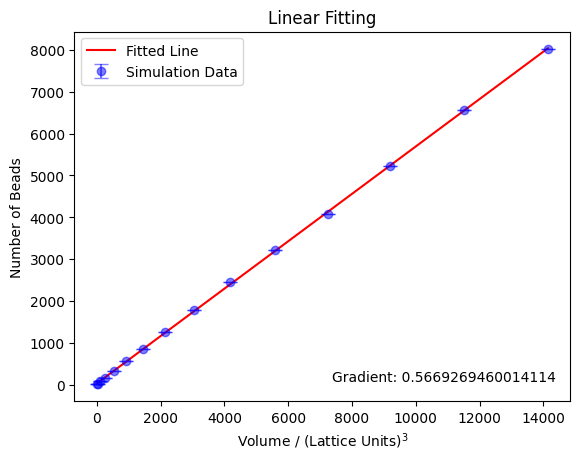

0.5669269460014114


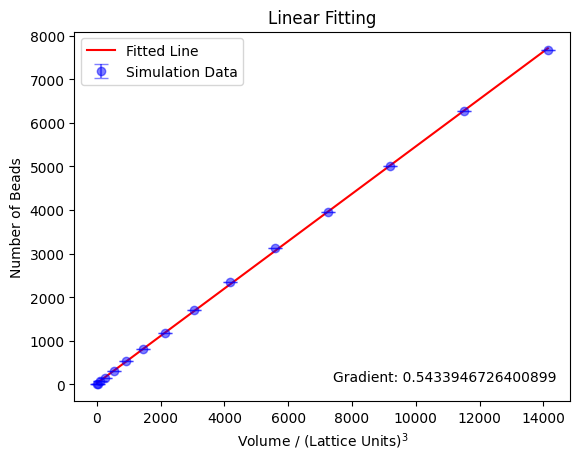

0.5433946726400899


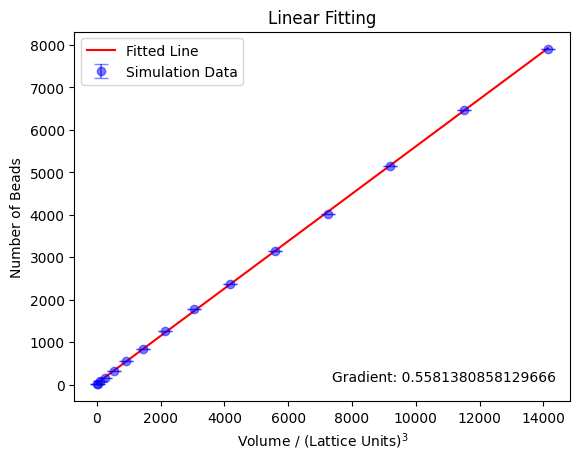

0.5581380858129666


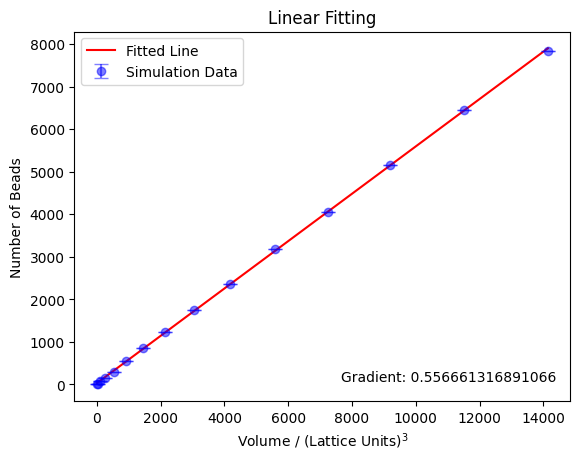

0.556661316891066


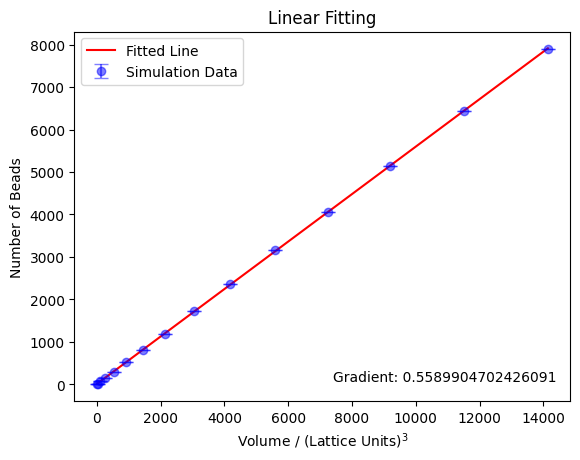

0.5589904702426091


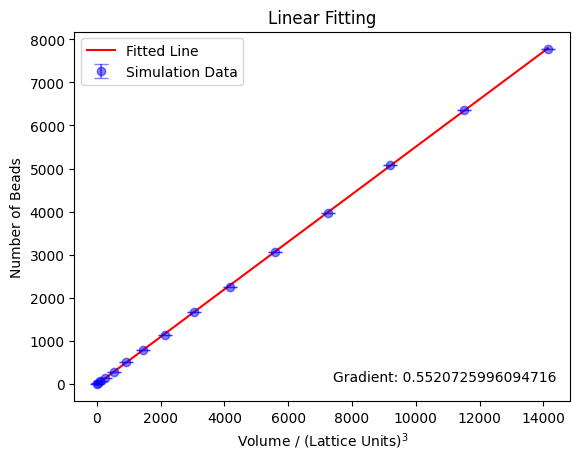

0.5520725996094716


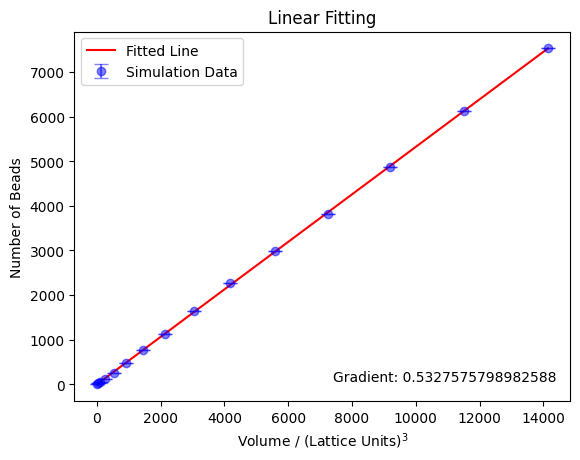

0.5327575798982588


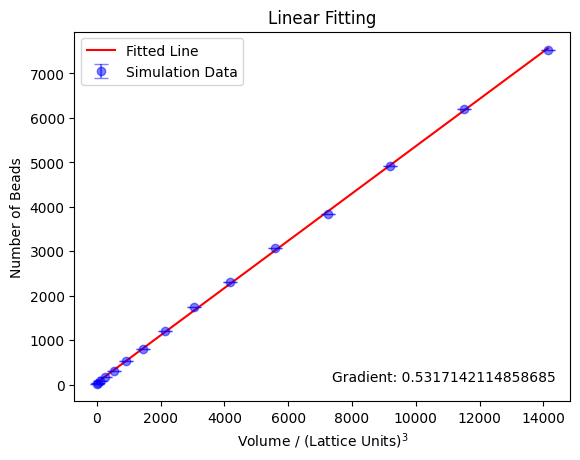

0.5317142114858685


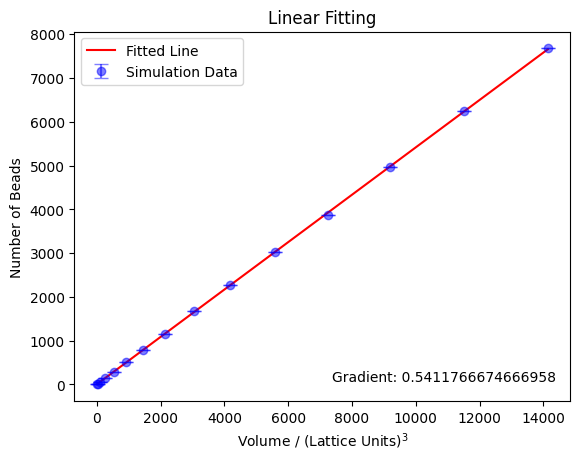

0.5411766674666958


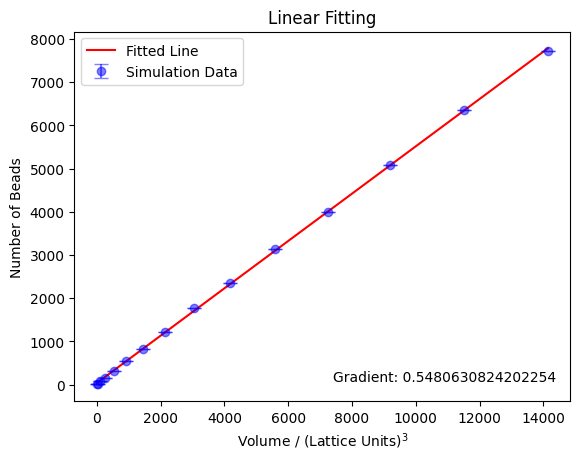

0.5480630824202254


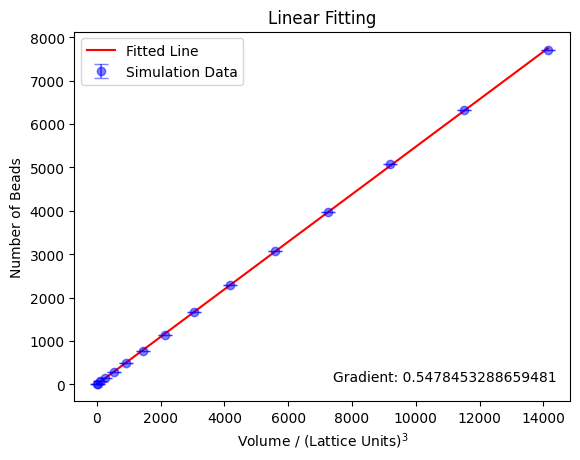

0.5478453288659481


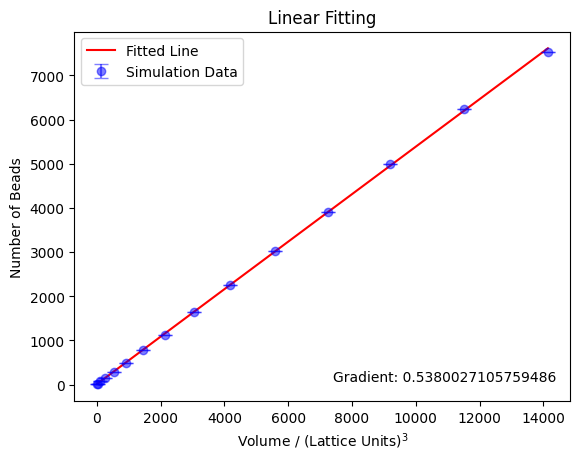

0.5380027105759486


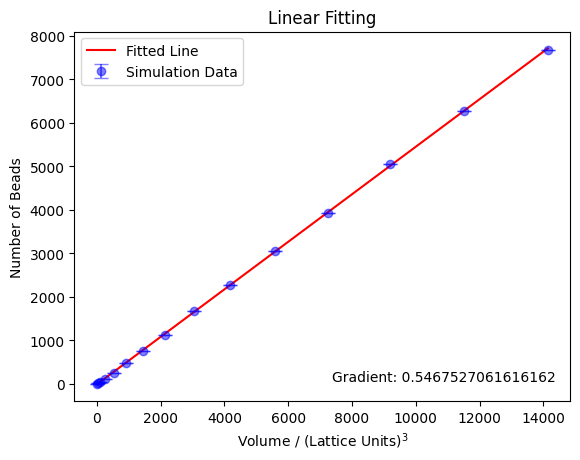

0.5467527061616162


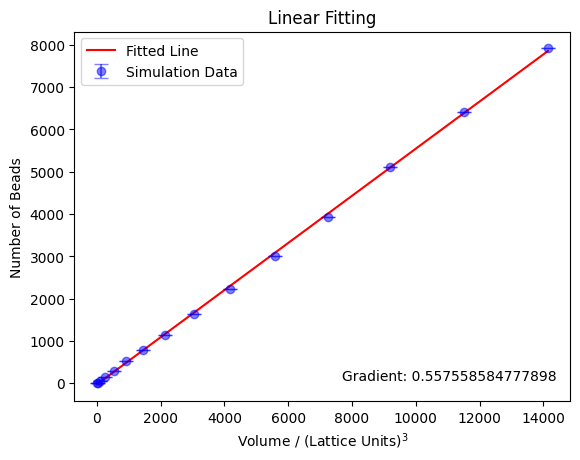

0.557558584777898


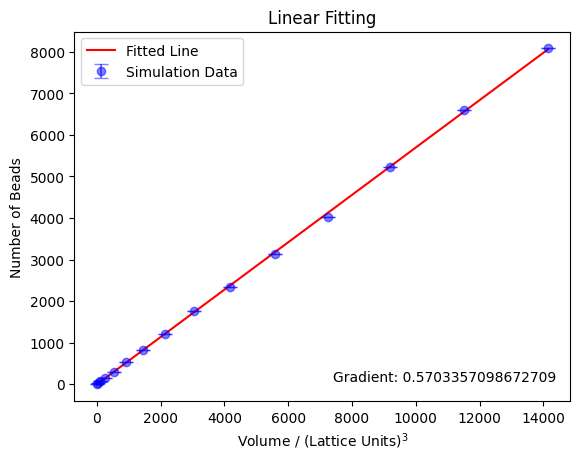

0.5703357098672709


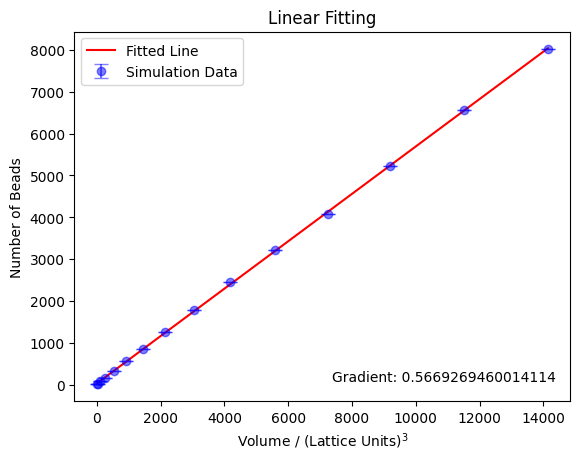

0.5669269460014114


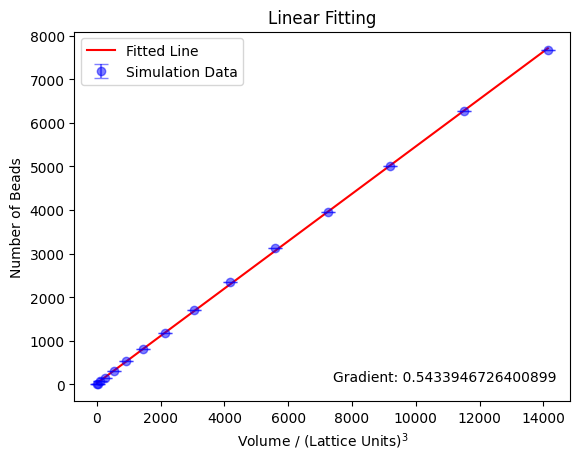

0.5433946726400899


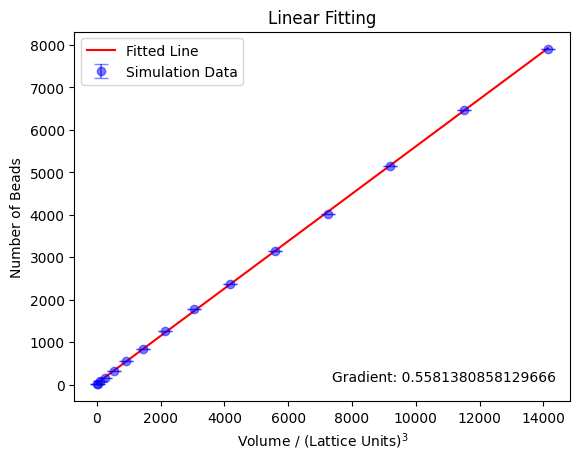

0.5581380858129666


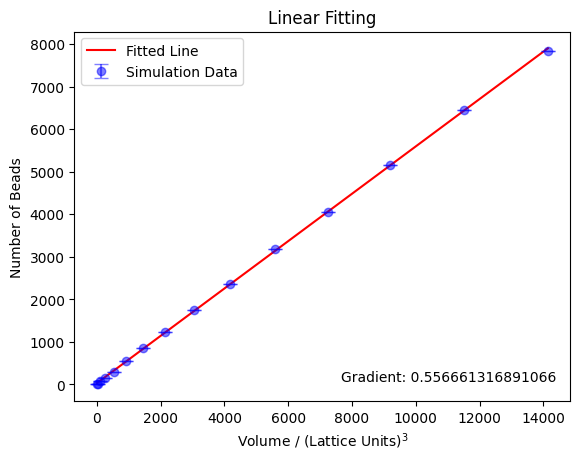

0.556661316891066


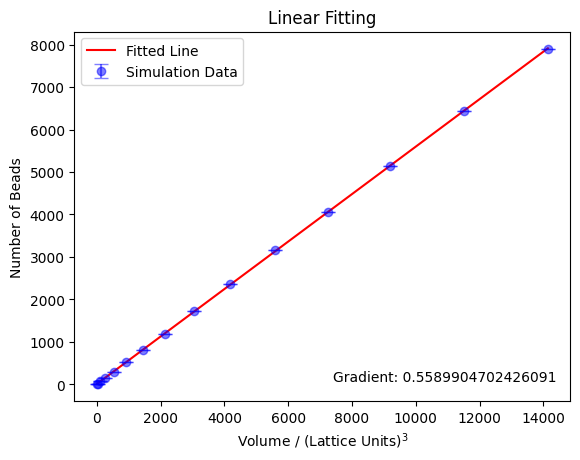

0.5589904702426091


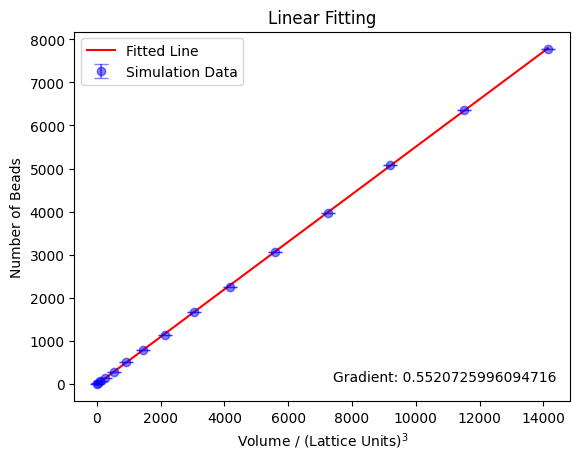

0.5520725996094716


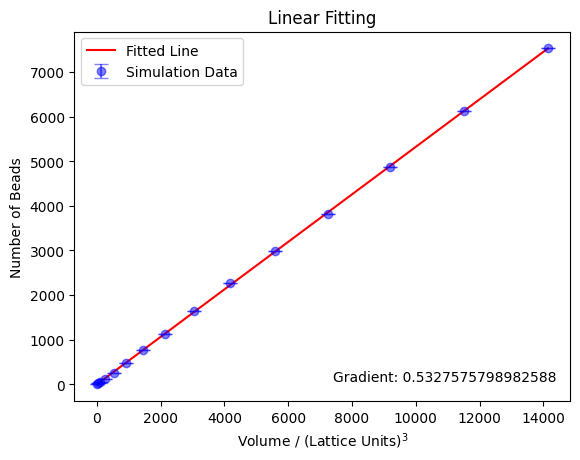

0.5327575798982588


In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'
def fit_and_plot(volumes, counts, t):
    # Scale the input data
    scaled_volumes = np.array(volumes)  # Adjust the scaling factor as needed

    # Perform linear fitting with numpy.polyfit
    coeffs, cov_matrix = np.polyfit(scaled_volumes, counts, 1, cov = True)

    # Extract the optimized parameters
    slope, intercept = coeffs
    slope_error, intercept_error = np.sqrt(np.diag(cov_matrix))

    # Generate the fitted line
    fitted_line = slope * scaled_volumes + intercept

    # Plot the original data and the fitted line

    plt.plot(volumes, fitted_line, label='Fitted Line', color='red')
    plt.errorbar(volumes, counts, marker = 'o', yerr = slope_error, label='Simulation Data', color = 'blue', alpha = 0.5, linestyle='None', capsize = 5)
    plt.text(14400, 0.05, f'Gradient: {slope}', horizontalalignment='right', verticalalignment='bottom')
    # Add labels and title
    plt.xlabel(f'Volume / (Lattice Units){label_2}')
    plt.ylabel('Number of Beads')
    plt.title(f'Linear Fitting')
    plt.legend()
    save_path_1 =f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/linear_approx_den_time_{t}.png'
    plt.savefig(save_path_1)
    plt.show()

    # Return the optimized parameters
    print(slope)
    return slope, intercept

den_concs_dict = {}
for d in shuff:
  den_concs_dict[d] = {}
  for e in temps:
    den_concs_dict[d][e] = {}
    particle_counts_dict_inner = particle_counts_dict[d][e]
    for t, data in particle_counts_dict_inner.items():
      particle_counts = data
      st_1 = 0
      ed_1 = 15
      truncated_particle_counts = particle_counts[st_1:ed_1]
      truncated_volumes = volumes[st_1:ed_1]
      slope, intercept = fit_and_plot(truncated_volumes, truncated_particle_counts, t)
      den_concs_dict[d][e][t] = slope

In [ ]:
print(radii[59])

60


[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 431.0109047344394, 446.46710965086777, 415.8331396125133, 357.1177956921217, 277.81749404960084, 194.24479401003262, 142.85601142409092, 135.04577001890877, 152.82774617195662, 171.61002301730514, 184.40845967579688, 192.0235402235882, 192.27854794542216, 189.566874743453, 187.47095775079404, 185.7034194623244, 185.08700656718182, 185.41197372338172, 186.07245900455013, 187.5899784103618, 189.7741815948629, 192.1359935046008, 194.4763224662581, 196.67150276539815, 198.7013839911539, 200.1935063881943, 202.44031219102584, 2

<ipython-input-50-b53533c83341>:48: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = np.array([(overlapping_differences[i] / dy[i]) * gradient[i] for i in range(len(overlapping_differences))])
<ipython-input-50-b53533c83341>:48: RuntimeWarning: invalid value encountered in scalar multiply
  sigma = np.array([(overlapping_differences[i] / dy[i]) * gradient[i] for i in range(len(overlapping_differences))])


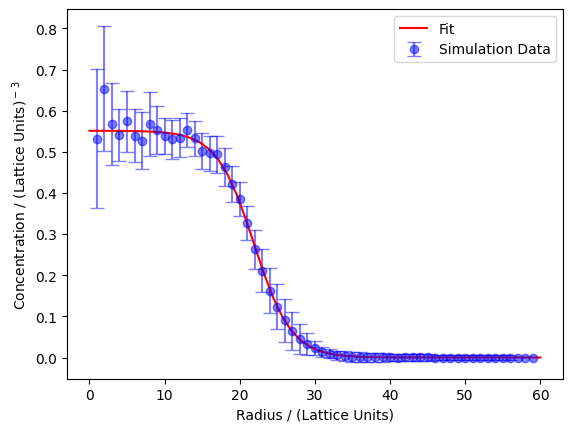

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

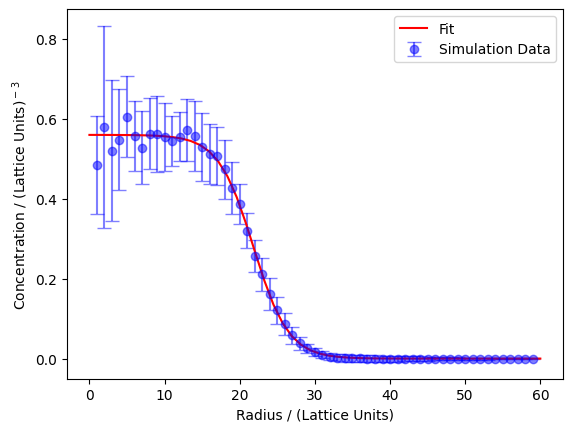

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

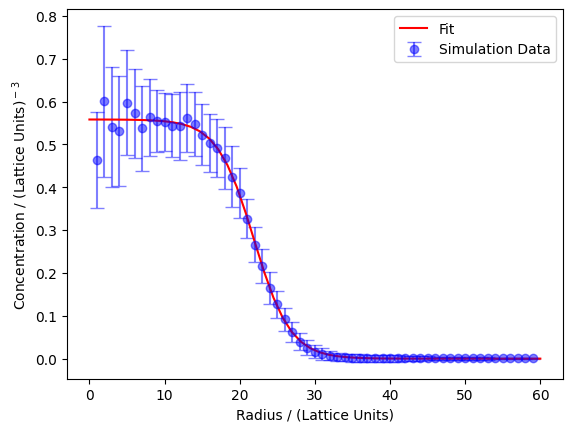

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222
[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 4

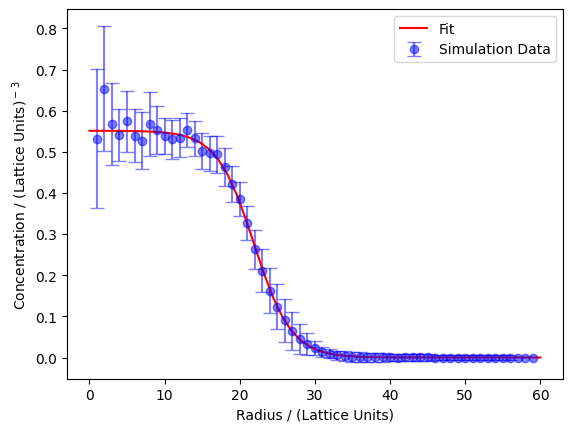

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

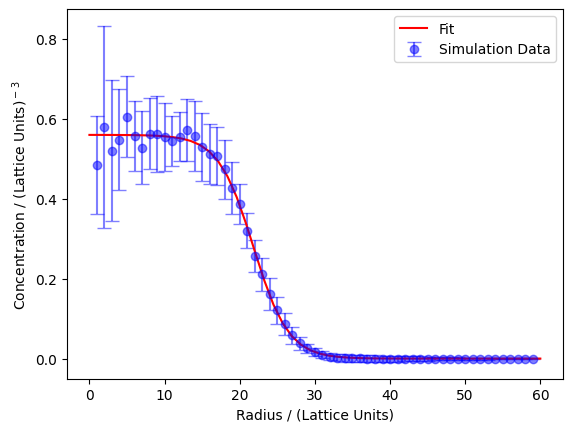

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

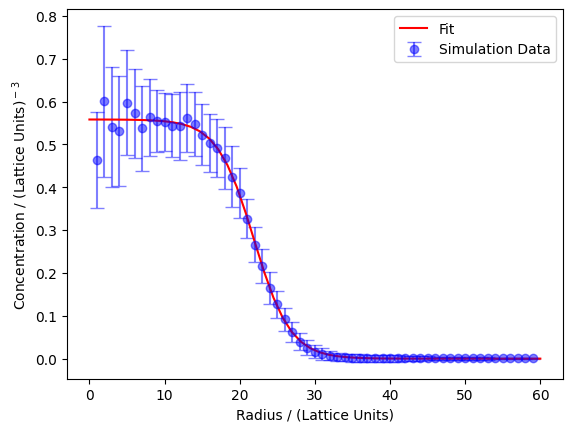

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222
[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 4

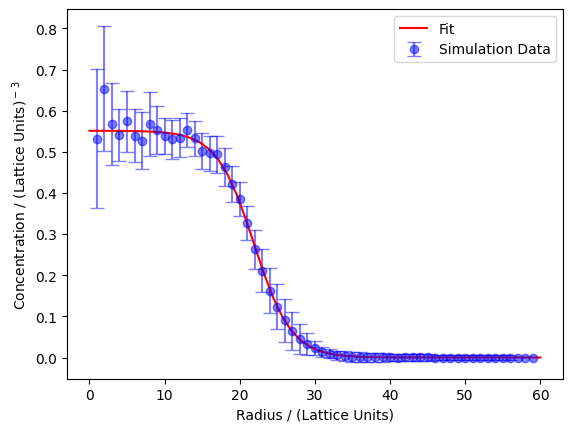

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

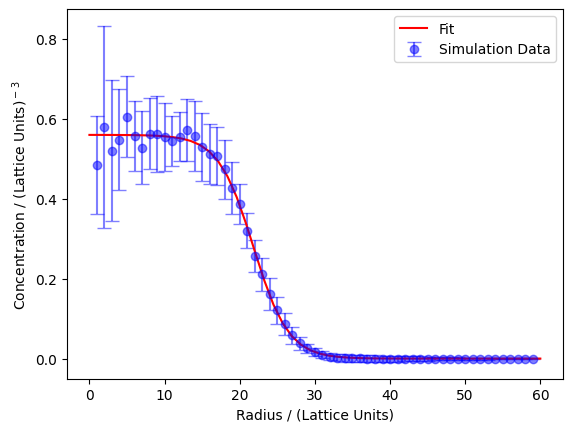

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

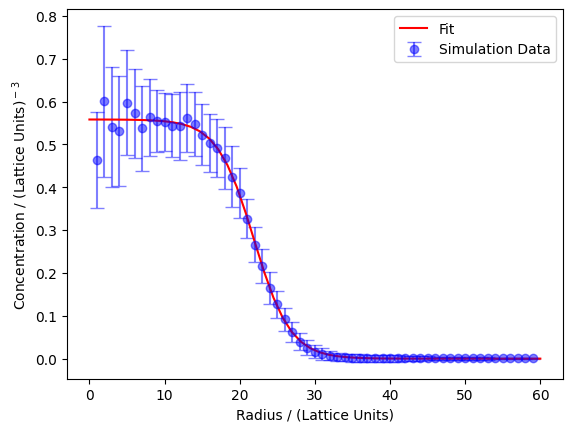

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222
[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 4

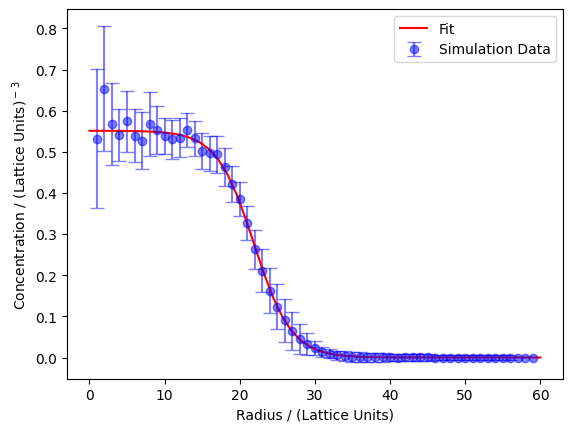

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

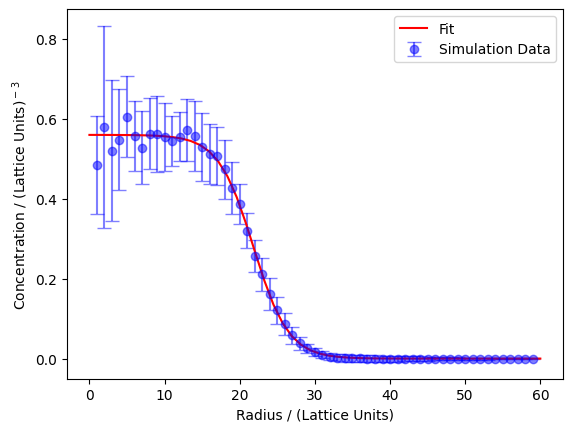

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

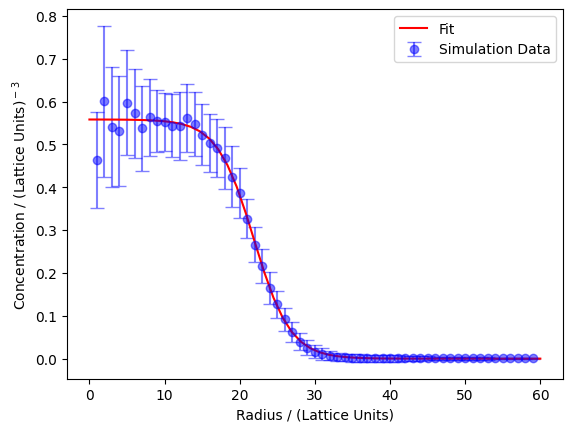

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222
[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 4

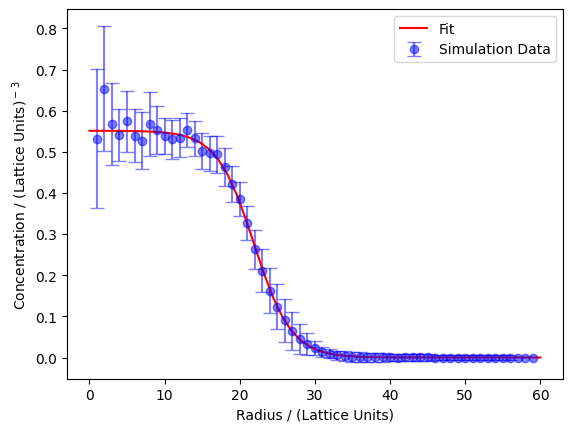

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

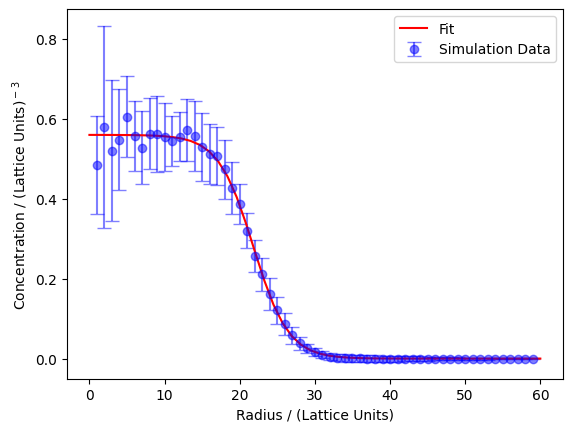

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

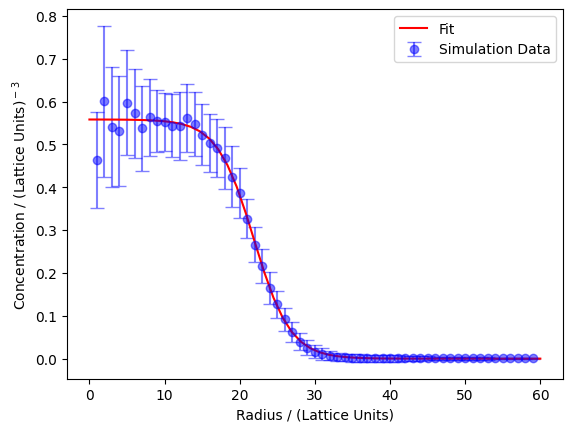

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222
[4.963869458396343, 8.284926070883191, 11.593101396951552, 12.759310326189267, 23.30836759620888, 29.691749695833014, 43.575222317275674, 62.745836515262106, 60.58250572566308, 54.103604316163626, 71.60949657692059, 85.06891324097188, 88.09721902534723, 106.06375441214591, 124.06740103669456, 136.82835963352042, 163.38053739659446, 191.64321015887833, 200.9407872981491, 205.12747256279448, 232.98326120131463, 285.6949422023428, 350.53342208696733, 395.53912575117016, 4

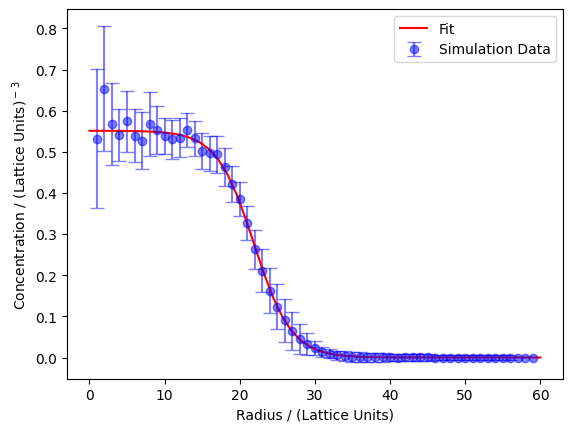

[5.51183143e-01 2.27904150e-04 2.19095010e+01 9.88869830e+00]
31.798199320894987
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27076
31.798199320894987
0.5317142114858685
0.00032134116860676754
2202000000
27163
31.798199320894987
0.5411766674666958
0.00026673827472241445
2402000000
27277
31.798199320894987
0.5480630824202254
0.0001951896551498139
2602000000
27139
31.798199320894987
0.5478453288659481
0.0002818011420008567
2802000000
27007
31.798199320894987
0.5380027105759486
0.000364646912032289
[3.5777087639996634, 13.728801841384412, 20.661074512231934, 26.047648646278997, 32.231661452677244, 40.369295262612646, 56.17472741366886, 71.66142616498782, 96.72310995827212, 107.4798585782471, 96.20395002285508, 111.95356180131117, 165.73931338098393, 217.49390796065993, 240.3710465093498, 242.14243742062231, 261.3465132730873, 302.4166662074033, 294.2533602187068, 254.5530985865228, 243.82141005252186, 247.9856447458199, 273.1922400069226, 292.01630091486334, 272

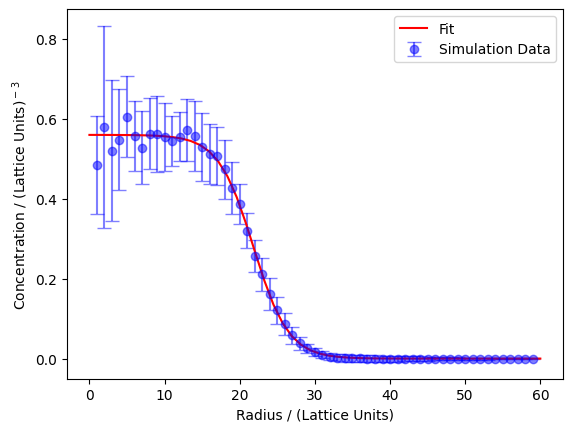

[5.59911363e-01 3.51025211e-04 2.18186835e+01 9.32117986e+00]
31.13986334821991
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27084
31.13986334821991
0.5467527061616162
0.00031470199886974486
2202000000
26903
31.13986334821991
0.557558584777898
0.00042771997862256993
2402000000
27103
31.13986334821991
0.5703357098672709
0.0003028382330393378
2602000000
27046
31.13986334821991
0.5669269460014114
0.000338429530530559
2802000000
27070
31.13986334821991
0.5433946726400899
0.00032344372106057114
[3.2619012860600183, 9.595832428716124, 16.43411086733931, 26.375746434935262, 39.17448148986787, 47.46619849956388, 61.496666576327534, 73.52169747768342, 73.53638555164375, 86.35369129342416, 113.08686926429611, 142.83304939683953, 169.14750958852454, 185.42405453446432, 202.47528244207984, 219.15419229391892, 246.475962316815, 296.2444936197127, 324.8485185436437, 293.7765136970619, 253.24454584452553, 247.01319802795962, 260.70366318868633, 270.92582010579946, 251.14203

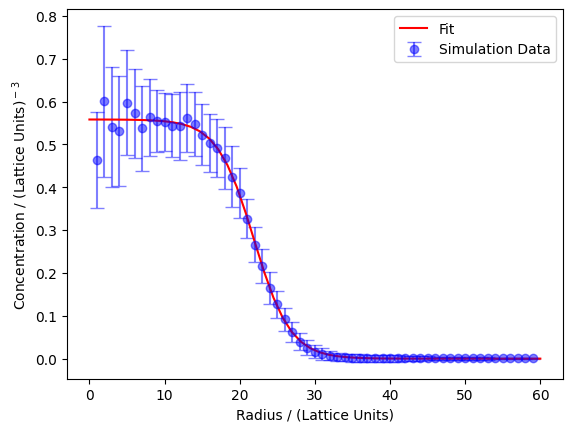

[ 5.58242753e-01 -3.45901043e-04  2.18810374e+01  9.73071044e+00]
31.61174785701712
[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27209
31.61174785701712
0.5581380858129666
0.00023751668605138753
2202000000
27004
31.61174785701712
0.556661316891066
0.0003659887721741697
2402000000
27098
31.61174785701712
0.5589904702426091
0.0003070796204886013
2602000000
27023
31.61174785701712
0.5520725996094716
0.00035408160321644843
2802000000
27280
31.61174785701712
0.5327575798982588
0.00019302147573569222


In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

def custom_function(x, a, b, xmid, delta):

    term1 = 0.5 * (a + b)
    term2 =  0.5 * (a - b) * np.tanh(2 * (x - xmid) / delta)

    return term1 - term2

for d in shuff:
  for e in temps:
    particle_counts_dict_inner = particle_counts_dict[d][e]
    list_length = len(list(particle_counts_dict_inner.values())[0])  # Assuming all lists have the same length

    # Calculate the average for each position in every list
    position_averages = [sum(particle_counts_dict_inner[key][i] for key in particle_counts_dict_inner) / len(particle_counts_dict_inner) for i in range(list_length)]


    all_values = np.array(list(particle_counts_dict_inner.values()))

    all_values = np.array(list(particle_counts_dict_inner.values()))

    # Calculate standard deviations for each position
    position_std = np.std(all_values, axis=0)
    position_std = position_std[:59]


    den_concs_dict_2 = {}
    dil_concs_dict_2 = {}


    particle_counts = position_averages

    x = volumes[:59]
    y = particle_counts[:59]
    dx = np.gradient(x)
    dy = np.gradient(y)
    radii_trunc = radii[:59]

    overlapping_differences = [((position_std[i + 1])**2 + (position_std[i])**2)**(1/2) for i in range(len(position_std) - 1)]
    overlapping_differences.append(position_std[-1])
    print((overlapping_differences))
    gradient = dy / dx

    print(len(gradient))
    sigma = np.array([(overlapping_differences[i] / dy[i]) * gradient[i] for i in range(len(overlapping_differences))])
    sigma = np.array(sigma)
    sigma_list = sigma.tolist()
    plt.errorbar(radii_trunc, gradient, yerr=sigma_list, marker='o', color = 'blue', capsize=5, alpha=0.5, linestyle='None', label = 'Simulation Data')

    _x = radii_trunc[2:]
    _y = gradient[2:]

    popt, pcov = curve_fit(custom_function, _x, _y, p0 = (0.55, 0, 20, 5))

    ii = np.linspace(0, 60)
    plt.plot(ii, custom_function(ii, *popt), color = 'red', label = 'Fit')
    plt.xlabel('X')
    #plt.yscale('log')
    plt.ylabel(f'Concentration / (Lattice Units){label_3}')
    plt.xlabel(f'Radius / (Lattice Units)')
    plt.legend()
    path = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/volume_frac_fit_2.png'
    plt.savefig(path)
    plt.show()
    print(popt)

    dil_conc_1 = popt[1]
    den_conc_1 = popt[0]
    den_rad = popt[2] + popt[3]
    print(den_rad)

    path = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/results_trj.lammpstrj'
    times = []
    for i in range(5):
        time = 2000000000 + i * 200000000 + 2000000
        #time = 1200000000 + i * 200000000 + 2000000
        times.append(time)
    print(times)
    list_conc_den = []
    list_conc_dil = []
    for i, t in enumerate(times):
      print(t)
      x_coords, y_coords, z_coords = [], [], []
      start_processing = False
      with open(path, 'r') as file:
        for line in file:
            if line.startswith('ITEM: TIMESTEP'):
              timestep_value = next(file).strip()

              if timestep_value == str(t):
                start_processing = True
              else:
                start_processing = False
                continue

            if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
              continue

            if start_processing:
              items = line.split()
              if len(items) >= 7:
                x_coords.append(float(items[3]))
                y_coords.append(float(items[4]))
                z_coords.append(float(items[5]))

      x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
      coordinates = np.column_stack((x_coords, y_coords, z_coords))
      center = np.array([60, 60, 60])
      # Calculate distances for the current run
      distances = np.linalg.norm(coordinates - center, axis=1)
      distances = np.abs(distances)
      distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)
      den_count = np.sum(distances <= den_rad)
      print(den_count)
      print(den_rad)

      den_vol = (den_rad**3)*4/3*math.pi
      dil_count = (209*132)-den_count
      dil_vol = 120**3 - den_vol
      dil_conc = float(dil_count/dil_vol)
      dil_conc = format(dil_conc)
      slope = den_concs_dict[d][e][t]
      list_conc_den.append(slope)
      list_conc_dil.append(dil_conc)
      den_conc = slope
      print(den_conc)
      print(dil_conc)
    list_conc_dil_float = [float(value) for value in list_conc_dil]
    formatted_output = f'Radius of Dense Phase: {den_rad}\nDense Phase concentration (linear): {list_conc_den}\nDense Phase concentration (log function): {den_conc_1}\nDilute Phase concentration (mass balance): {list_conc_dil_float}\nDilute Phase concentration (log function): {dil_conc_1}\nNumber of beads in Dense Phase: {den_count}\nNumber of beads in Dilute Phase: {dil_count}\nPoints used in log approximation: first two points omitted\nPoints used in linear approximation: {st_1},{ed_1}'
    with open(f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/NEW_KEY_DATA_2.txt', 'w') as file:
        file.write(formatted_output)


In [ ]:
##end

In [ ]:
dil_conc_1 = popt[1]
den_conc_1 = popt[0]
den_rad = popt[2] + popt[3]
print(den_rad)

31.42932558555269


In [ ]:
path = f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/results_trj.lammpstrj'
times = []
for i in range(5):
    time = 2000000000 + i * 200000000 + 2000000
    #time = 1200000000 + i * 200000000 + 2000000
    times.append(time)
print(times)
particle_counts_dict = {}
list_conc_den = []
list_conc_dil = []
for i, t in enumerate(times):
  print(t)
  x_coords, y_coords, z_coords = [], [], []
  start_processing = False
  with open(path, 'r') as file:
    for line in file:
        if line.startswith('ITEM: TIMESTEP'):
          timestep_value = next(file).strip()

          if timestep_value == str(t):
            start_processing = True
          else:
            start_processing = False
            continue

        if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
          continue

        if start_processing:
          items = line.split()
          if len(items) >= 7:
            x_coords.append(float(items[3]))
            y_coords.append(float(items[4]))
            z_coords.append(float(items[5]))

  x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
  coordinates = np.column_stack((x_coords, y_coords, z_coords))
  center = np.array([60, 60, 60])
  # Calculate distances for the current run
  distances = np.linalg.norm(coordinates - center, axis=1)
  distances = np.abs(distances)
  distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)
  den_count = np.sum(distances <= den_rad)
  print(den_count)
  print(den_rad)

  den_vol = (den_rad**3)*4/3*math.pi
  dil_count = (209*132)-den_count
  dil_vol = 120**3 - den_vol
  dil_conc = float(dil_count/dil_vol)
  dil_conc = format(dil_conc)
  slope = den_concs_dict[t]
  list_conc_den.append(slope)
  list_conc_dil.append(dil_conc)
  den_conc = slope
  print(den_conc)
  print(dil_conc)
list_conc_dil_float = [float(value) for value in list_conc_dil]
formatted_output = f'Radius of Dense Phase: {den_rad}\nDense Phase concentration (linear): {list_conc_den}\nDense Phase concentration (log function): {den_conc_1}\nDilute Phase concentration (mass balance): {list_conc_dil_float}\nDilute Phase concentration (log function): {dil_conc_1}\nNumber of beads in Dense Phase: {den_count}\nNumber of beads in Dilute Phase: {dil_count}\nPoints used in log approximation: first two points omitted\nPoints used in linear approximation: {st_1},{ed_1}'
with open(f'/content/drive/MyDrive/CHUNK_{c}_132/reshuffle_{d}/{e}/NEW_KEY_DATA_2.txt', 'w') as file:
    file.write(formatted_output)


[2002000000, 2202000000, 2402000000, 2602000000, 2802000000]
2002000000
27035
31.42932558555269
0.5540583916473929
0.00034606732612357056
2202000000
27145
31.42932558555269
0.5566199874241007
0.0002772293408187012
2402000000
27228
31.42932558555269
0.5431505077794265
0.00022528795190684522
2602000000
27086
31.42932558555269
0.5422203654830182
0.0003141515329367675
2802000000
26339
31.42932558555269
0.5646091568202232
0.0007816240331434713


In [ ]:
den_concs_dict_2[t] = popt[0]
dil_concs_dict_2[t] = popt[1]
den_rad = popt[2]
print(den_rad)
den_vol = (den_rad**3)*4/3*math.pi
den_count = slope*den_vol
print(den_count)
dil_count = (209*132)-den_count
dil_vol = 120**3 - den_vol
dil_conc = dil_count/dil_vol
dil_conc = format(dil_conc)
den_conc = slope
print(den_conc)
print(dil_conc)

[5.59568570e-01 5.66564391e-01 5.22937670e-01 5.20591849e-01
 5.11145645e-01 4.41245318e-01 3.15292872e-01 1.72875987e-01
 6.72567337e-02 1.72138790e-02 3.23070931e-03 5.71765256e-04
 2.17567453e-04 1.20094279e-04 3.92393844e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


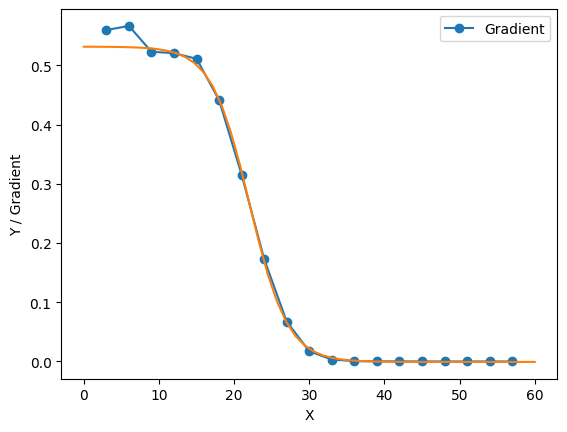

[ 5.31527677e-01 -7.70959208e-04  2.20661489e+01  1.01146008e+01]
22.06614886483827
3176.272860381293
0.07057478491996255
0.014504938145804235
[5.63357973e-01 5.50920957e-01 5.29884910e-01 5.40260657e-01
 5.11669181e-01 4.38000568e-01 3.11678430e-01 1.68065604e-01
 6.94309815e-02 2.12970347e-02 5.45334016e-03 1.67445539e-03
 5.56972679e-04 1.80141418e-04 7.19388714e-05 3.44939192e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


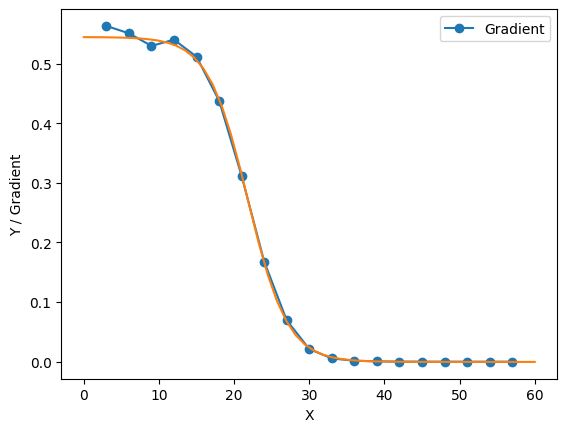

[ 5.44696301e-01 -3.59315989e-04  2.18233487e+01  1.05827752e+01]
21.823348736465668
3072.5739967068453
0.07057478491996255
0.014553847528318295
[6.10093949e-01 5.80507453e-01 5.42832038e-01 5.36471254e-01
 5.14984909e-01 4.45666288e-01 3.11529073e-01 1.60964563e-01
 6.70574276e-02 2.38967416e-02 5.64766854e-03 9.08698354e-04
 1.82756660e-04 2.70212127e-04 4.44713023e-04 3.44939192e-04
 2.80130628e-04 1.63571370e-04 2.58284555e-05]


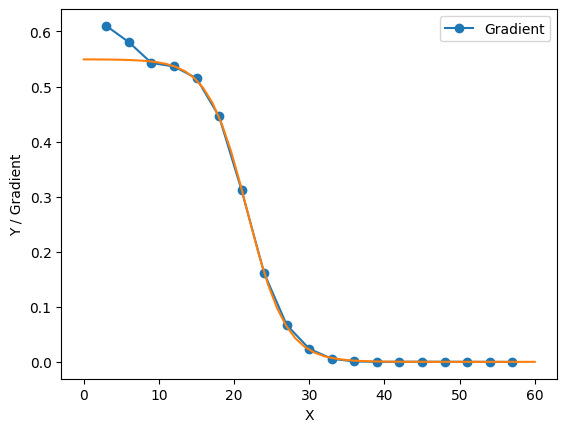

[5.49483635e-01 1.57073154e-04 2.17382850e+01 1.03677287e+01]
21.738285035549
3036.7847480628916
0.07057478491996255
0.014570707663022863
[5.39358418e-01 5.45139688e-01 5.48989819e-01 5.43689165e-01
 5.17486248e-01 4.40474690e-01 2.93098405e-01 1.51366705e-01
 7.20400790e-02 3.20777405e-02 1.11495908e-02 2.40958215e-03
 9.57296792e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


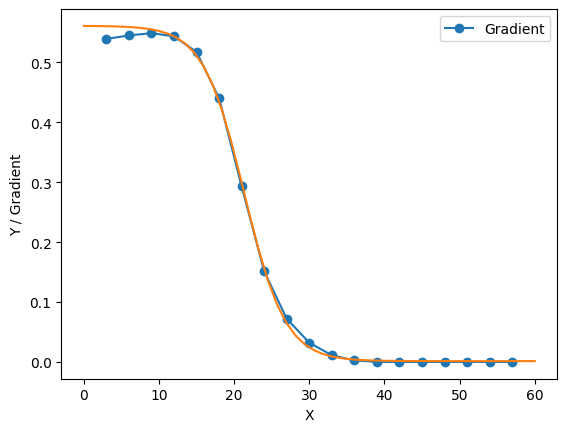

[5.61284752e-01 1.34244237e-03 2.13605810e+01 1.09194354e+01]
21.36058102633294
2881.226215836203
0.07057478491996255
0.014643872738785941
[5.25463939e-01 5.32556925e-01 5.39989985e-01 5.31328492e-01
 5.01896509e-01 4.35283091e-01 3.00715618e-01 1.60254459e-01
 7.17682980e-02 2.78477088e-02 9.70427347e-03 2.63420422e-03
 6.09188868e-04 5.62941932e-04 4.51252921e-04 1.78218582e-04
 2.90317197e-04 2.90793547e-04 1.72189704e-04]


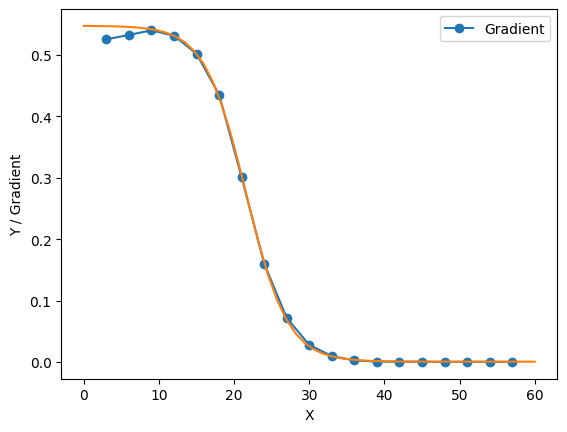

[5.47407853e-01 5.94305228e-04 2.16054515e+01 1.10245352e+01]
21.60545145513908
2981.454659006288
0.07057478491996255
0.014596753425696149


In [ ]:
def custom_function(x, a, b, xmid, delta):

    term1 = 0.5 * (a + b)
    term2 =  0.5 * (a - b) * np.tanh(2 * (x - xmid) / delta)

    return term1 - term2

den_concs_dict_2 = {}
dil_concs_dict_2 = {}

for t, data in particle_counts_dict.items():
  particle_counts = data
  ##derivative calc
  x = volumes
  y = particle_counts
  dx = np.gradient(x)
  dy = np.gradient(y)
  gradient = dy / dx
  print(gradient)
  plt.plot(radii, gradient, label='Gradient', marker='o')

  _x = radii[2:]
  _y = gradient[2:]

  popt, pcov = curve_fit(custom_function, _x, _y, p0 = (0.55, 0, 20, 5))

  ii = np.linspace(0, 60)
  plt.plot(ii, custom_function(ii, *popt))
  plt.xlabel('X')
#plt.yscale('log')
  plt.ylabel('Y / Gradient')
  plt.legend()
  #plt.xlim(right=150000)
  #plt.ylim(top=0.7)
  plt.show()

  print(popt)
  den_concs_dict_2[t] = popt[0]
  dil_concs_dict_2[t] = popt[1]
  den_rad = popt[2]
  print(den_rad)
  den_vol = (den_rad**3)*4/3*math.pi
  den_count = slope*den_vol
  print(den_count)
  dil_count = (209*132)-den_count
  dil_vol = 120**3 - den_vol
  dil_conc = dil_count/dil_vol
  dil_conc = format(dil_conc)
  den_conc = slope
  print(den_conc)
  print(dil_conc)

  formatted_output = f'Radius of Dense Phase: {den_rad}\nDense Phase concentration: {den_conc}\nDilute Phase concentration: {dil_conc}\nNumber of beads in Dense Phase: {den_count}\nNumber of beads in Dilute Phase: {dil_count}\nPoints used in cubic approximation: {st},{ed}\nPoints used in linear approximation: {st_1},{ed_1} '

  with open('KEY_DATA.txt', 'w') as file:
      file.write(formatted_output)

In [ ]:
print(particle_counts_dict)

{2002000000: [6, 28, 86, 170, 305, 529, 810, 1211, 1752, 2318, 3062, 3841, 4918, 6186, 7522, 9053, 10780, 12628, 14484, 16413, 18401, 20170, 21808, 23183, 24335, 25283, 25948, 26404, 26687, 26895, 27010, 27086, 27120, 27140, 27153, 27161, 27163, 27171, 27176, 27181, 27185, 27186, 27188, 27191, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192, 27192], 2202000000: [4, 17, 68, 143, 291, 514, 780, 1150, 1688, 2281, 3031, 3870, 4958, 6238, 7676, 9159, 10822, 12666, 14586, 16526, 18475, 20174, 21752, 23100, 24190, 25124, 25812, 26315, 26670, 26932, 27082, 27178, 27262, 27319, 27358, 27381, 27400, 27416, 27426, 27434, 27438, 27445, 27446, 27448, 27450, 27452, 27455, 27456, 27456, 27456, 27456, 27456, 27456, 27456, 27456, 27456, 27456, 27456, 27456], 2402000000: [5, 19, 72, 150, 310, 555, 819, 1226, 1779, 2362, 3142, 3993, 5073, 6361, 7725, 9198, 10944, 12846, 14782, 16707, 18713, 20449, 22003, 23275, 24317, 25124, 25740, 26257, 26675, 26976, 271

In [ ]:
print(den_concs_dict)
print(den_concs_dict_2)
print(dil_concs_dict_2)

all_values = list(den_concs_dict.values())
average_across_dict = np.mean(all_values)
print(average_across_dict)
all_values = list(den_concs_dict_2.values())
average_across_dict = np.mean(all_values)
print(average_across_dict)
all_values = list(dil_concs_dict_2.values())
average_across_dict = np.mean(all_values)
print(average_across_dict)

{2002000000: 0.5317142114858685, 2202000000: 0.5411766674666958, 2402000000: 0.5480630824202254, 2602000000: 0.5478453288659481, 2802000000: 0.5380027105759486}
{2002000000: 0.5498725894077421, 2202000000: 0.5467811994503062, 2402000000: 0.5653278364919305, 2602000000: 0.5532597137001877, 2802000000: 0.5404707268315009}
{2002000000: -0.0016340466267604824, 2202000000: -0.00022957550964475883, 2402000000: -0.00042290266087429063, 2602000000: 0.0022802859122332004, 2802000000: 0.0013011581866986355}
0.5413604001629372
0.5511424131763334
0.0002589838603304608


In [ ]:
popt

array([ 5.46060601e-01, -1.27185644e-03,  2.19119467e+01,  1.12812951e+01])

In [ ]:
den_rad = popt[2] + 2 * popt[3]

In [ ]:
seqs = ['Sequence_WT_2']
runs = ['Run_1']
temps = ['50.0']
runs_n = 1
import math
for i in list(seqs):
    sequence_with_space = i.replace('_', ' ')
    for temp in list(temps):
        distances_per_temp = []  # Collect distances for each run at a specific temperature
        for j in range(1, runs_n + 1):
            run_path = f'Run_{j}'
            loc_no_E = '50.0'
            path = f'/content/drive/MyDrive/A_132/{loc_no_E}/results_trj.lammpstrj'

             # Initialize lists to store particle coordinates
            x_coords, y_coords, z_coords = [], [], []
            start_processing = False

            # Open the file and read lines
            with open(path, 'r') as file:
                for line in file:
                    if line.startswith('ITEM: TIMESTEP'):
                        timestep_value = next(file).strip()

                        if timestep_value == '2402000000':
                            start_processing = True
                        else:
                            start_processing = False
                            continue

                    if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
                        continue

                    if start_processing:
                        items = line.split()
                        if len(items) >= 7:
                            x_coords.append(float(items[3]))
                            y_coords.append(float(items[4]))
                            z_coords.append(float(items[5]))

            x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
            coordinates = np.column_stack((x_coords, y_coords, z_coords))
            center = np.array([60, 60, 60])

            # Calculate distances for the current run
            distances = np.linalg.norm(coordinates - center, axis=1)
            distances = np.abs(distances)
            distances = np.sqrt((x_coords - 60)**2 + (y_coords - 60)**2 + (z_coords - 60)**2)

            distances_per_temp.append(distances)

            den_count = np.sum(distances <= den_rad)
print(den_count)
print(den_rad)

den_vol = (den_rad**3)*4/3*math.pi
dil_count = (209*132)-den_count
dil_vol = 120**3 - den_vol
dil_conc = dil_count/dil_vol
dil_conc = format(dil_conc)
den_conc = slope
print(den_conc)
print(dil_conc)

20254
21.91194670801579
0.5571681474244077
0.004355284895776754


In [ ]:
print(den_count)
print(den_rad)

20313
21.937996362058332
